# Predicting Check-ins of Foursquare Users in Tokyo

## 4 - Machine Learning

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
sns.set_context("poster")
rcParams['figure.figsize'] = (12.5, 11)
rcParams['figure.dpi'] = 250
rcParams['font.size'] = 12

### Load engineered features

In [3]:
df = pd.read_csv('df_afterwrangling.csv',
                 index_col=0,
                 parse_dates=[0],
                 date_parser=pd.to_datetime,
                 infer_datetime_format=True)

In [4]:
df_creatures_of_habit = pd.read_csv('df_creatures_of_habit.csv',
                                    index_col=0,
                                    parse_dates=[0],
                                    date_parser=pd.to_datetime,
                                    infer_datetime_format=True
                                    )
df_irregular_creatures_of_habit = pd.read_csv('df_irregular_creatures_of_habit.csv',
                                              index_col=0,
                                              parse_dates=[0],
                                              date_parser=pd.to_datetime,
                                              infer_datetime_format=True
                                              )

In [5]:
df_creatures_of_habit.tail()

userid_time_place_0  userid_time_place_1  \
timestamp                                                       
2013-02-16 11:34:35                  0.0                  0.0   
2013-02-16 11:34:53                  0.0                  0.0   
2013-02-16 11:34:55                  0.0                  0.0   
2013-02-16 11:35:17                  0.0                  0.0   
2013-02-16 11:35:29                  0.0                  0.0   

                     userid_time_place_2  userid_time_place_3  \
timestamp                                                       
2013-02-16 11:34:35                  0.0                  0.0   
2013-02-16 11:34:53                  0.0                  0.0   
2013-02-16 11:34:55                  0.0                  0.0   
2013-02-16 11:35:17                  0.0                  0.0   
2013-02-16 11:35:29                  0.0                  0.0   

                     userid_time_place_4  userid_time_place_5  \
timestamp                                                       
2013-02-16 11:34:35                  0.0                  0.0   
2013-02-16 11:34:53                  0.0                  0.0   
2013-02-16 11:34:55                  0.0                  0.0   
2013-02-16 11:35:17                  0.0                  0.0   
2013-02-16 11:35:29                  0.0                  0.0   

                     userid_time_place_6  userid_time_place_7  \
timestamp                                                       
2013-02-16 11:34:35                  0.0                  0.0   
2013-02-16 11:34:53                  0.0                  0.0   
2013-02-16 11:34:55                  0.0                  0.0   
2013-02-16 11:35:17                  0.0                  0.0   
2013-02-16 11:35:29                  0.0                  0.0   

                     userid_time_place_8  userid_time_place_9  ...  \
timestamp                                                      ...   
2013-02-16 11:34:35                  0.0                  0.0  ...   
2013-02-16 11:34:53                  0.0                  0.0  ...   
2013-02-16 11:34:55                  0.0                  0.0  ...   
2013-02-16 11:35:17                  0.0                  0.0  ...   
2013-02-16 11:35:29                  0.0                  0.0  ...   

                     userid_time_place_237  userid_time_place_238  \
timestamp                                                           
2013-02-16 11:34:35                    0.0                    0.0   
2013-02-16 11:34:53                    0.0                    0.0   
2013-02-16 11:34:55                    0.0                    0.0   
2013-02-16 11:35:17                    0.0                    0.0   
2013-02-16 11:35:29                    0.0                    0.0   

                     userid_time_place_239  userid_time_place_240  \
timestamp                                                           
2013-02-16 11:34:35                    0.0                    0.0   
2013-02-16 11:34:53                    0.0                    0.0   
2013-02-16 11:34:55                    0.0                    0.0   
2013-02-16 11:35:17                    0.0                    0.0   
2013-02-16 11:35:29                    0.0                    0.0   

                     userid_time_place_241  userid_time_place_242  \
timestamp                                                           
2013-02-16 11:34:35                    0.0                    0.0   
2013-02-16 11:34:53                    0.0                    0.0   
2013-02-16 11:34:55                    0.0                    0.0   
2013-02-16 11:35:17                    0.0                    0.0   
2013-02-16 11:35:29                    0.0                    0.0   

                     userid_time_place_243  userid_time_place_244  \
timestamp                                                           
2013-02-16 11:34:35                    0.0                    0.0   
2013-02-16 11:34:53                    0.0     

In [6]:
df_irregular_creatures_of_habit.tail()

userid_place_0  userid_place_1  userid_place_2  \
timestamp                                                             
2013-02-16 11:34:35             0.0             0.0             0.0   
2013-02-16 11:34:53             1.0             0.0             0.0   
2013-02-16 11:34:55             0.0             0.0             0.0   
2013-02-16 11:35:17             0.0             0.0             0.0   
2013-02-16 11:35:29             0.0             0.0             0.0   

                     userid_place_3  userid_place_4  userid_place_5  \
timestamp                                                             
2013-02-16 11:34:35             0.0             0.0             0.0   
2013-02-16 11:34:53             0.0             0.0             0.0   
2013-02-16 11:34:55             0.0             0.0             0.0   
2013-02-16 11:35:17             0.0             0.0             0.0   
2013-02-16 11:35:29             0.0             0.0             0.0   

                     userid_place_6  userid_place_7  userid_place_8  \
timestamp                                                             
2013-02-16 11:34:35             0.0             0.0             0.0   
2013-02-16 11:34:53             0.0             0.0             0.0   
2013-02-16 11:34:55             0.0             0.0             0.0   
2013-02-16 11:35:17             0.0             0.0             0.0   
2013-02-16 11:35:29             0.0             0.0             0.0   

                     userid_place_9  ...  userid_place_237  userid_place_238  \
timestamp                            ...                                       
2013-02-16 11:34:35             0.0  ...               0.0               0.0   
2013-02-16 11:34:53             0.0  ...               0.0               0.0   
2013-02-16 11:34:55             0.0  ...               0.0               0.0   
2013-02-16 11:35:17             0.0  ...               0.0               0.0   
2013-02-16 11:35:29             0.0  ...               0.0               0.0   

                     userid_place_239  userid_place_240  userid_place_241  \
timestamp                                                                   
2013-02-16 11:34:35               0.0               0.0               0.0   
2013-02-16 11:34:53               0.0               0.0               0.0   
2013-02-16 11:34:55               0.0               0.0               0.0   
2013-02-16 11:35:17               0.0               0.0               0.0   
2013-02-16 11:35:29               0.0               0.0               0.0   

                     userid_place_242  userid_place_243  userid_place_244  \
timestamp                                                                   
2013-02-16 11:34:35               0.0               0.0               0.0   
2013-02-16 11:34:53               0.0               0.0               0.0   
2013-02-16 11:34:55               0.0               0.0               0.0   
2013-02-16 11:35:17               0.0               0.0               0.0   
2013-02-16 11:35:29               0.0               0.0               0.0   

                     userid_place_245  userid_place_246  
timestamp                                                
2013-02-16 11:34:35               0.0               0.0  
2013-02-16 11:34:53               0.0               0.0  
2013-02-16 11:34:55               0.0               0.0  
2013-02-16 11:35:17               0.0               0.0  
2013-02-16 11:35:29               0.0               0.0  

[5 rows x 247 columns]

### Concatenate all features into one DataFrame

In [7]:
df_ML = pd.concat(
    [df_creatures_of_habit, df_irregular_creatures_of_habit], axis=1)

### Perform Logistic Regression with hyperparameter tuning

In [8]:
Xtrain = df_ML['2012-July':'2013-Jan']
Xtest = df_ML['2013-Feb':]
ytrain = df['2012-July':'2013-Jan'].venuecat_encoded
ytest = df['2013-Feb':].venuecat_encoded

In [9]:
C_range = [0.01, 0.1, 1]
tscv = TimeSeriesSplit()
train_acc_dict = {}
test_acc_dict = {}

for C in C_range:
    
    C_train_acc = []
    C_test_acc = []
    
    for train_index, test_index in tscv.split(Xtrain):

        clf = LogisticRegression(C=C, max_iter=500)
        clf.fit(Xtrain.values[train_index], ytrain.values[train_index])
        ytrain_split = clf.predict(Xtrain.values[train_index])
        ytest_split = clf.predict(Xtrain.values[test_index])
    
        C_train_acc.append(accuracy_score(ytrain.values[train_index], ytrain_split))
        C_test_acc.append(accuracy_score(ytrain.values[test_index], ytest_split))
        
    train_acc_dict[C] = np.mean(C_train_acc)
    test_acc_dict[C] = np.mean(C_test_acc)

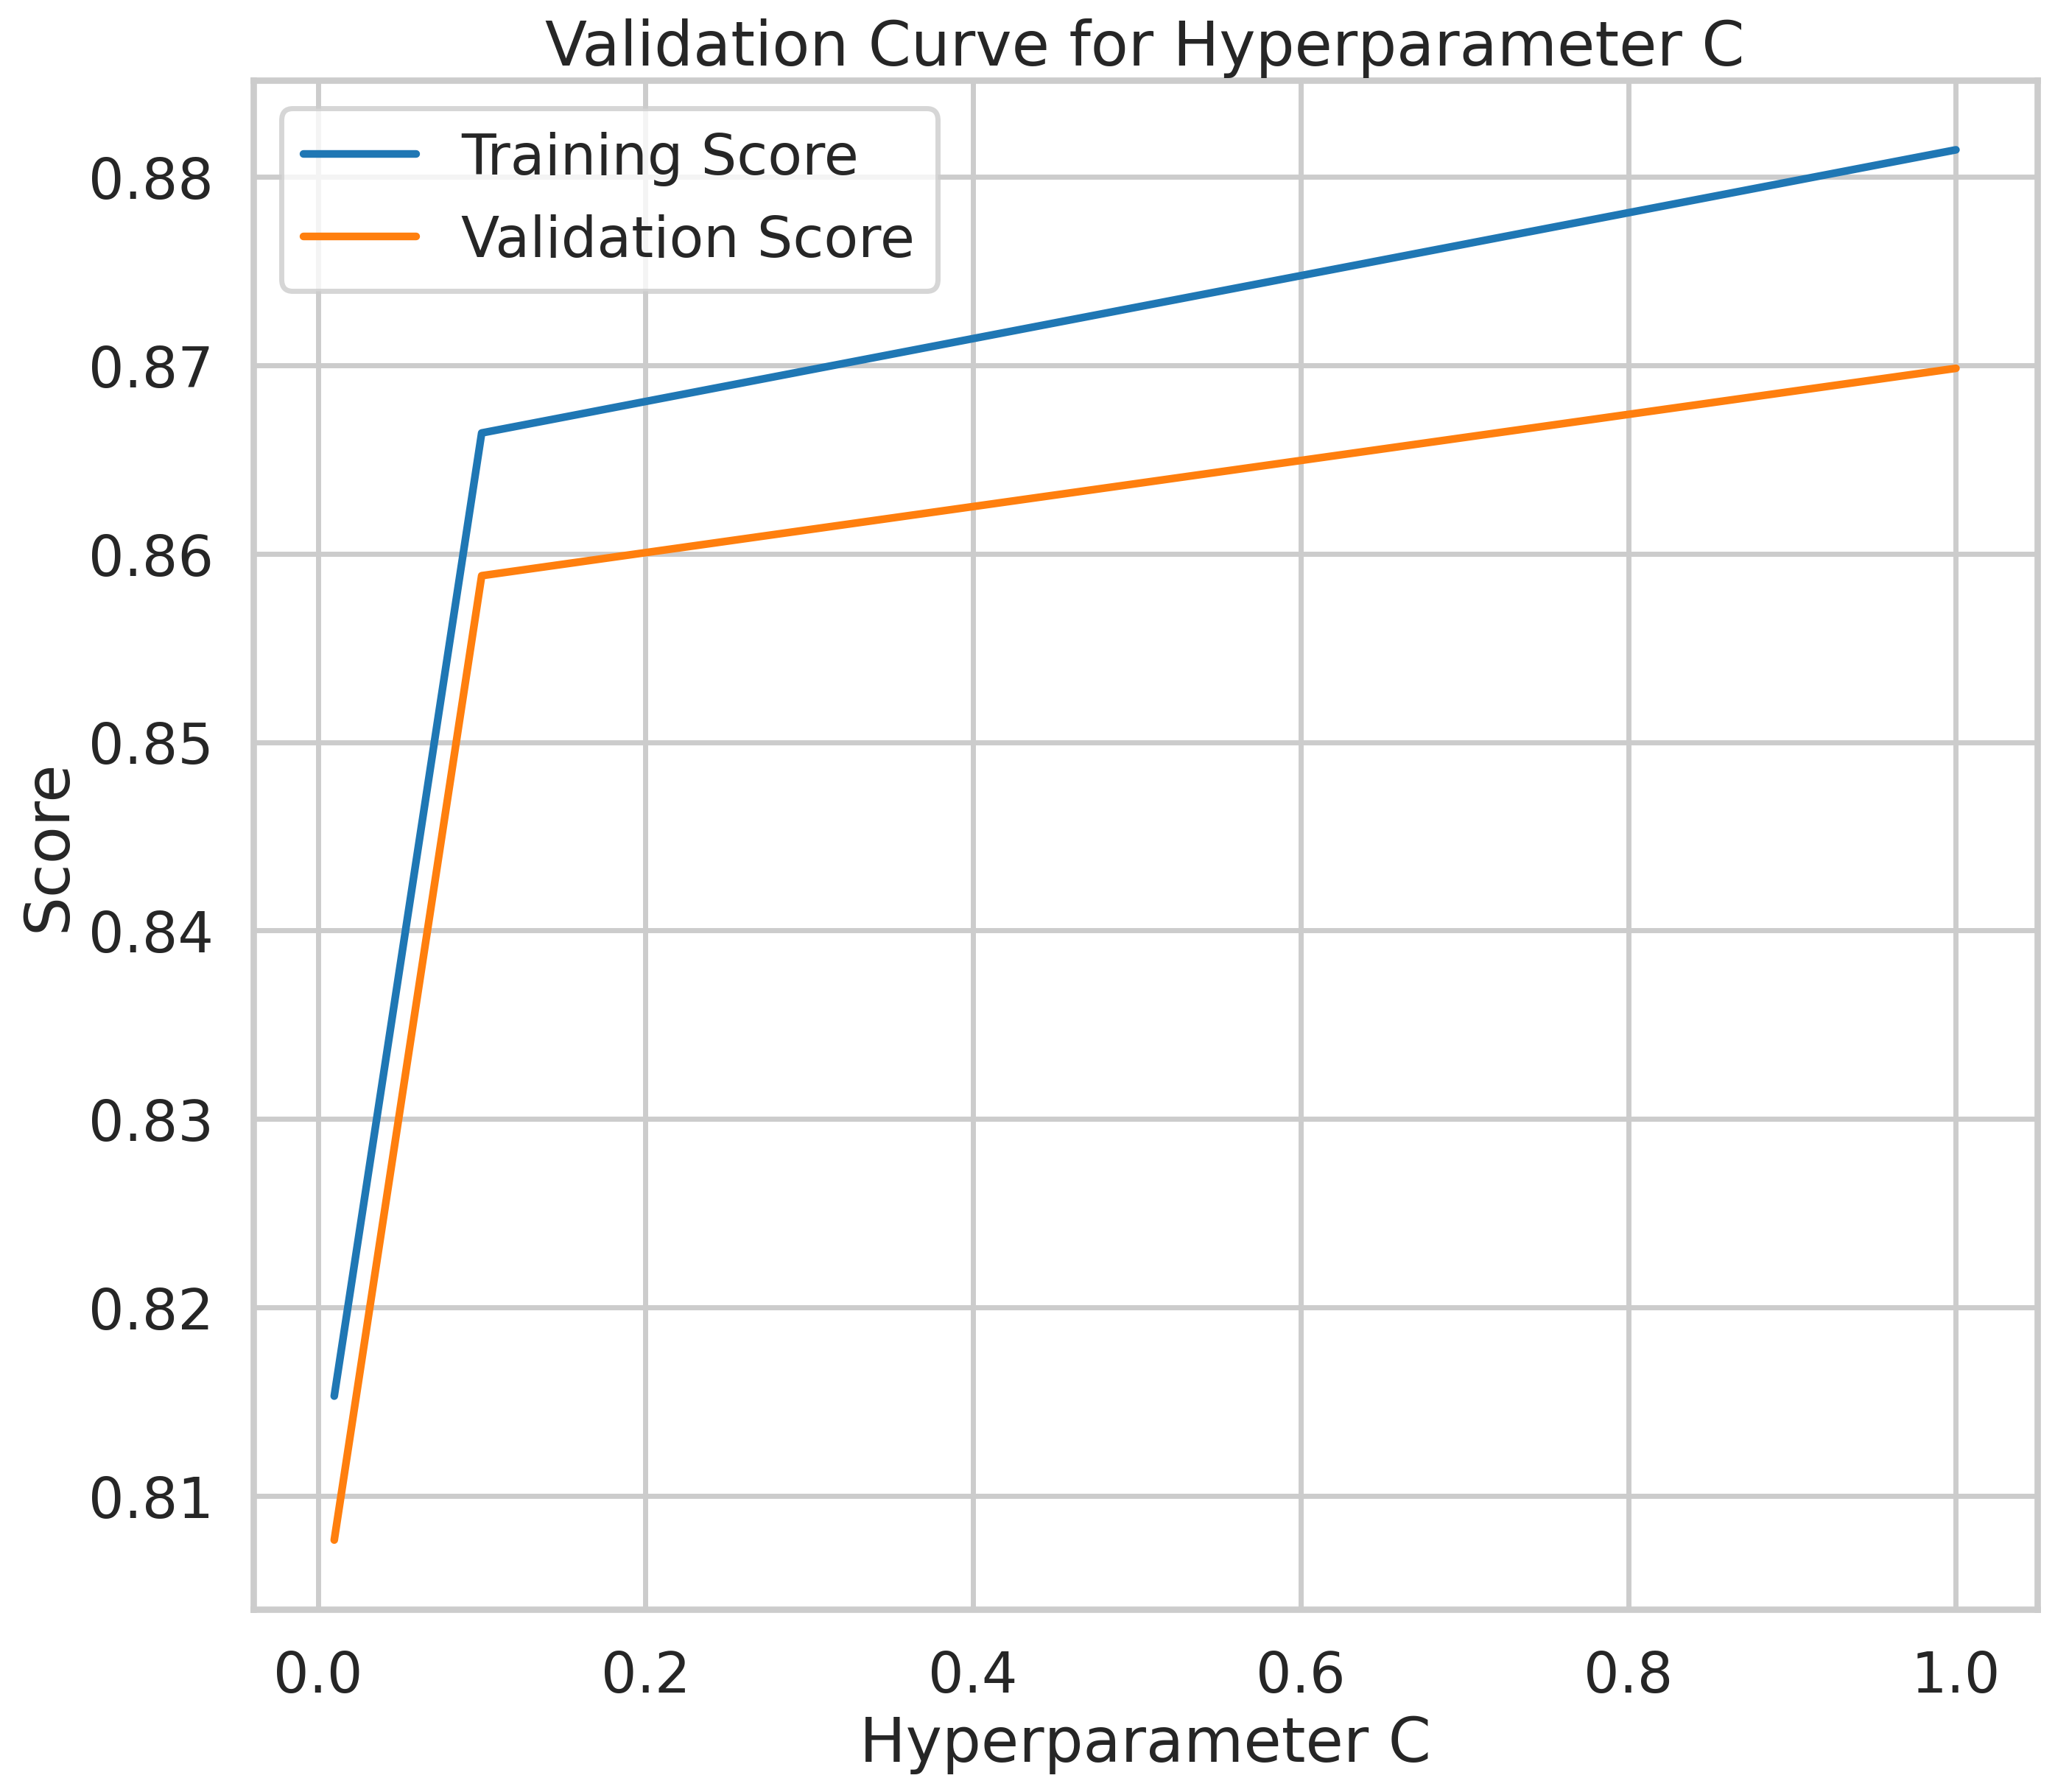

In [10]:
C_train_tuple = sorted(train_acc_dict.items())
C_test_tuple = sorted(test_acc_dict.items())

C_train, train_acc = zip(*C_train_tuple)
C_test, test_acc = zip(*C_test_tuple)

plt.plot(C_train, train_acc)
plt.plot(C_test, test_acc)

plt.xlabel("Hyperparameter C")
plt.ylabel("Score")
plt.legend(["Training Score", "Validation Score"])
plt.title("Validation Curve for Hyperparameter C");

In [11]:
acc_diff = {key: train_acc_dict[key] - test_acc_dict[key]
            for key in train_acc_dict.keys() if train_acc_dict[key] > test_acc_dict[key]}
C_best = min(acc_diff, key=acc_diff.get)

In [12]:
clf = LogisticRegression(C=C_best, max_iter=500)
clf.fit(Xtrain, ytrain)
ytrain_pred = clf.predict(Xtrain)
ytest_pred = clf.predict(Xtest)
ytest_probs = clf.predict_proba(Xtest)

### Evaluate model performance

In [13]:
print("Train Accuracy: {0:.2f}%".format(
    accuracy_score(ytrain, ytrain_pred) * 100))
print("Test Accuracy: {0:.2f}%".format(
    accuracy_score(ytest, ytest_pred) * 100))
print("F1 score: {0:.2f}".format(f1_score(ytest, ytest_pred, average='micro')))

Train Accuracy: 86.76%
Test Accuracy: 85.36%
F1 score: 0.85


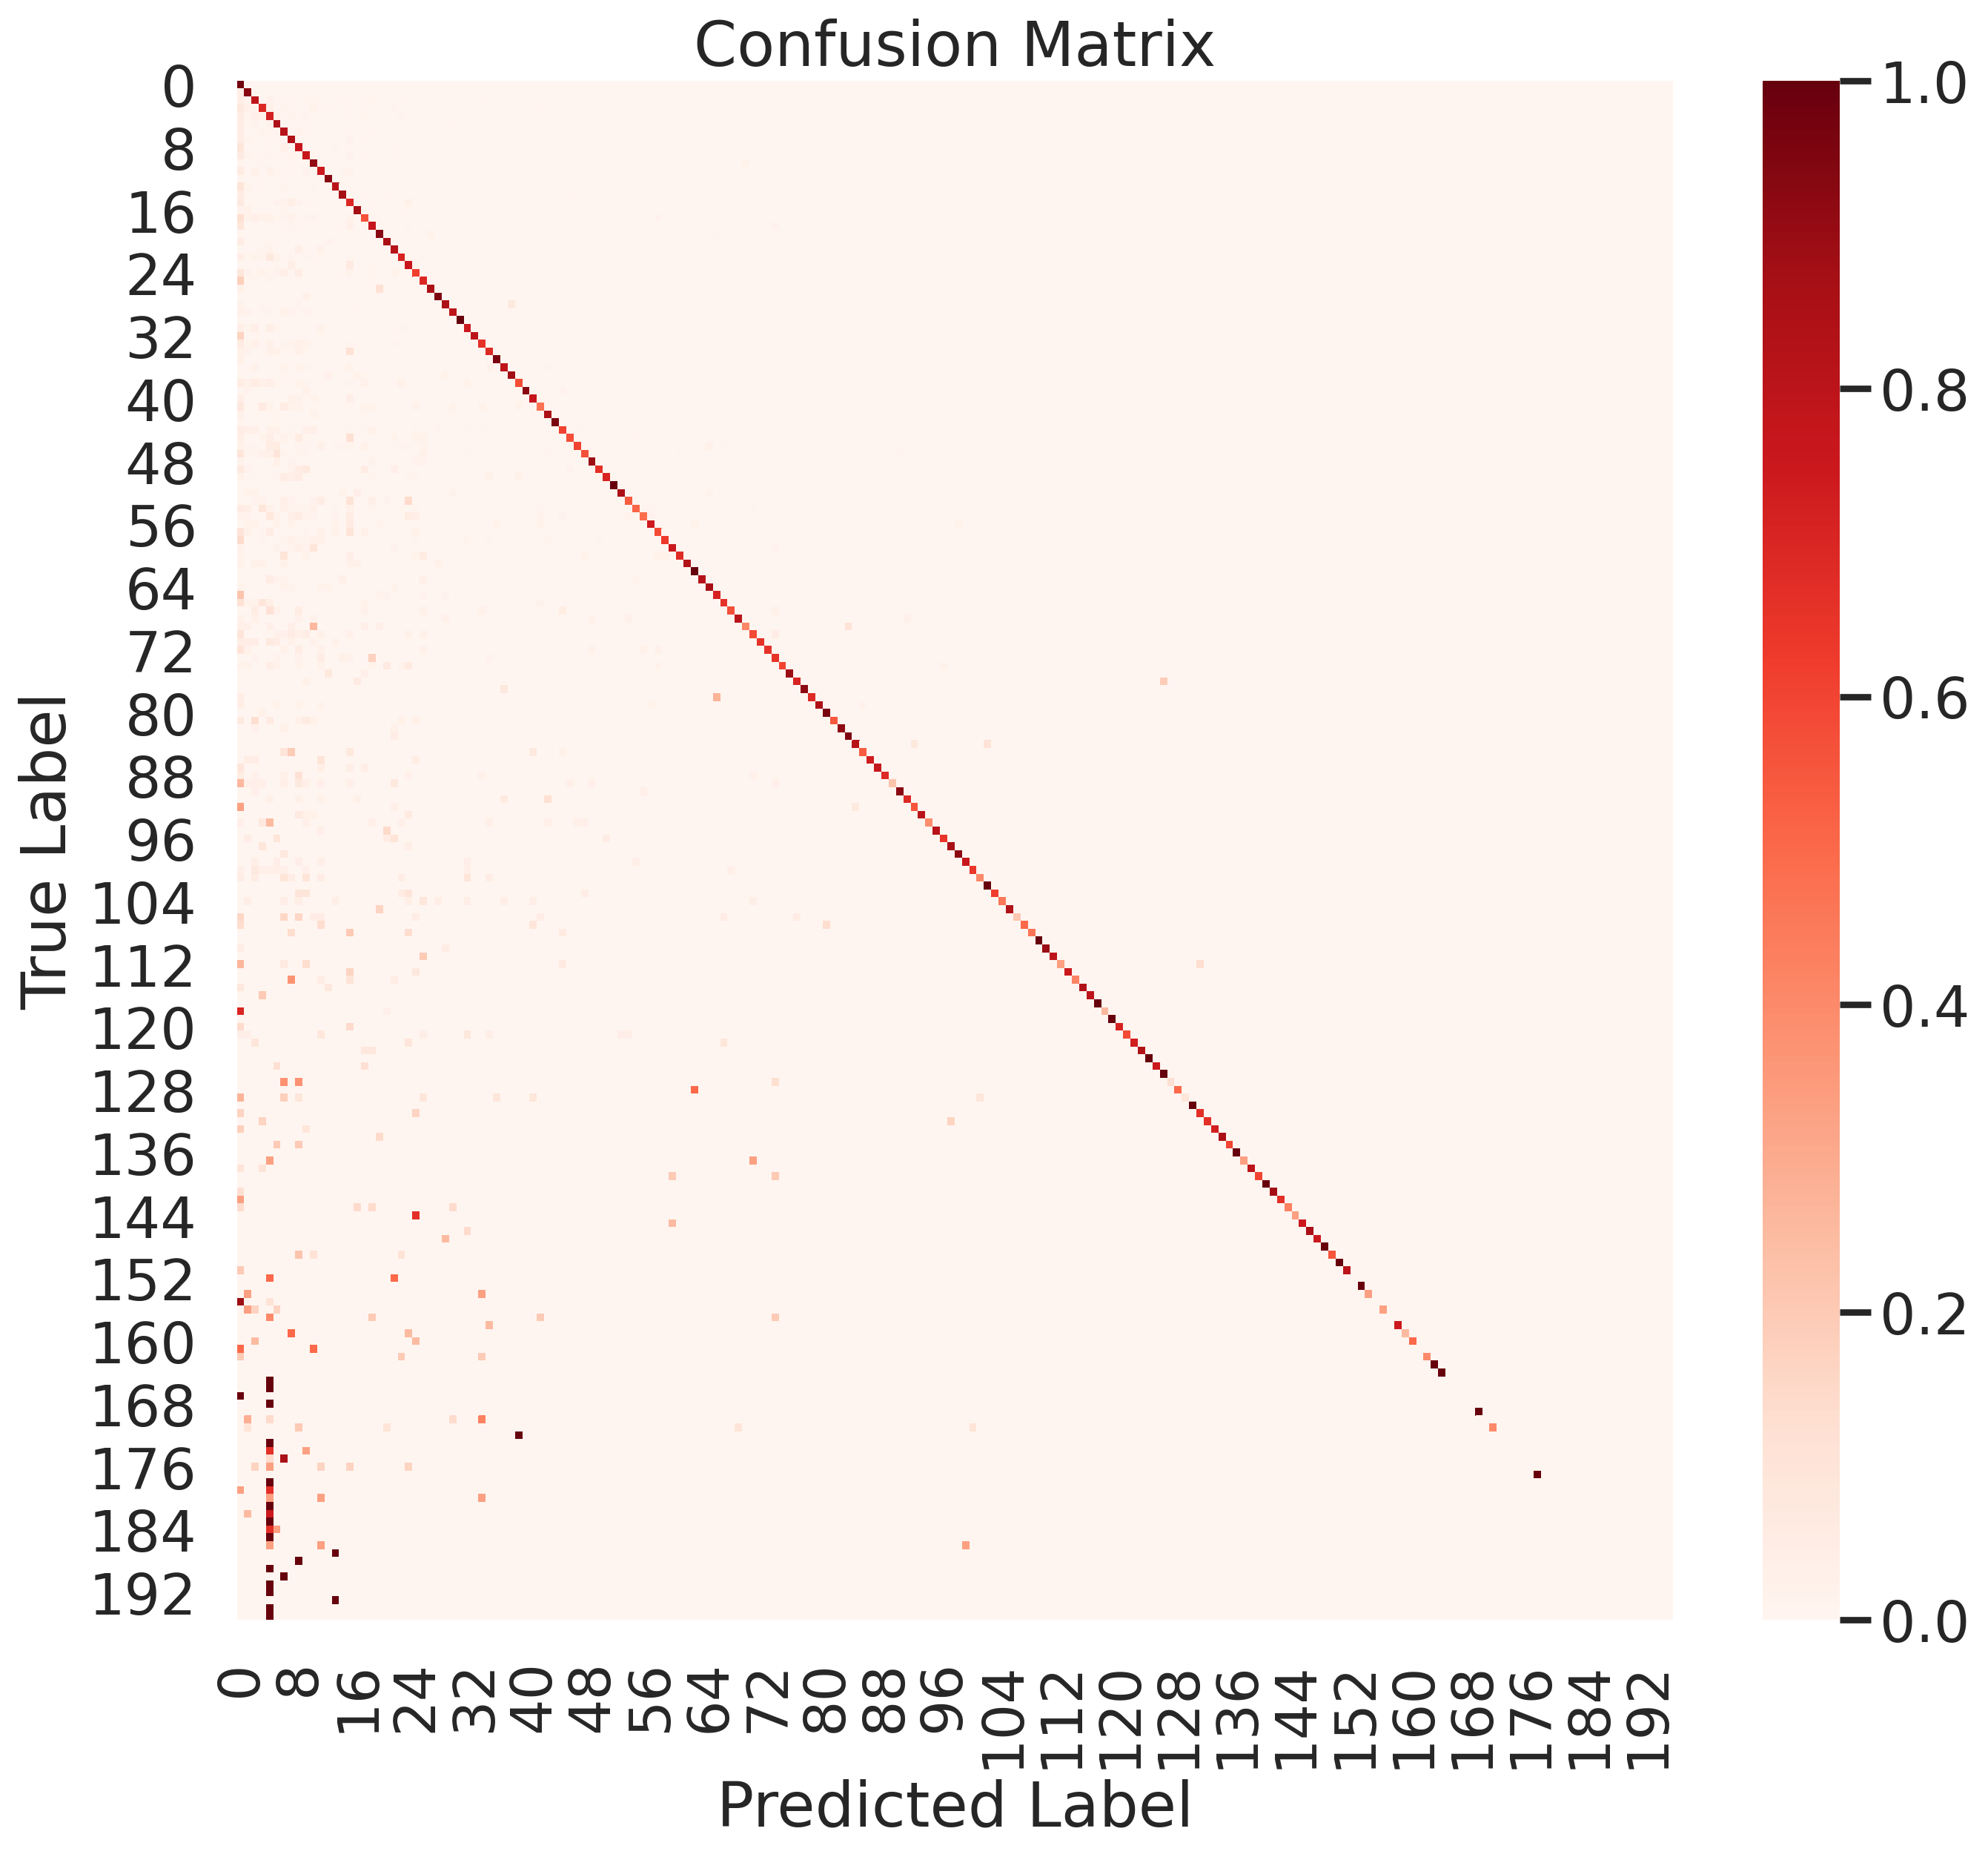

In [14]:
cm = confusion_matrix(ytest, ytest_pred, normalize='true')
sns.heatmap(cm, cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label");

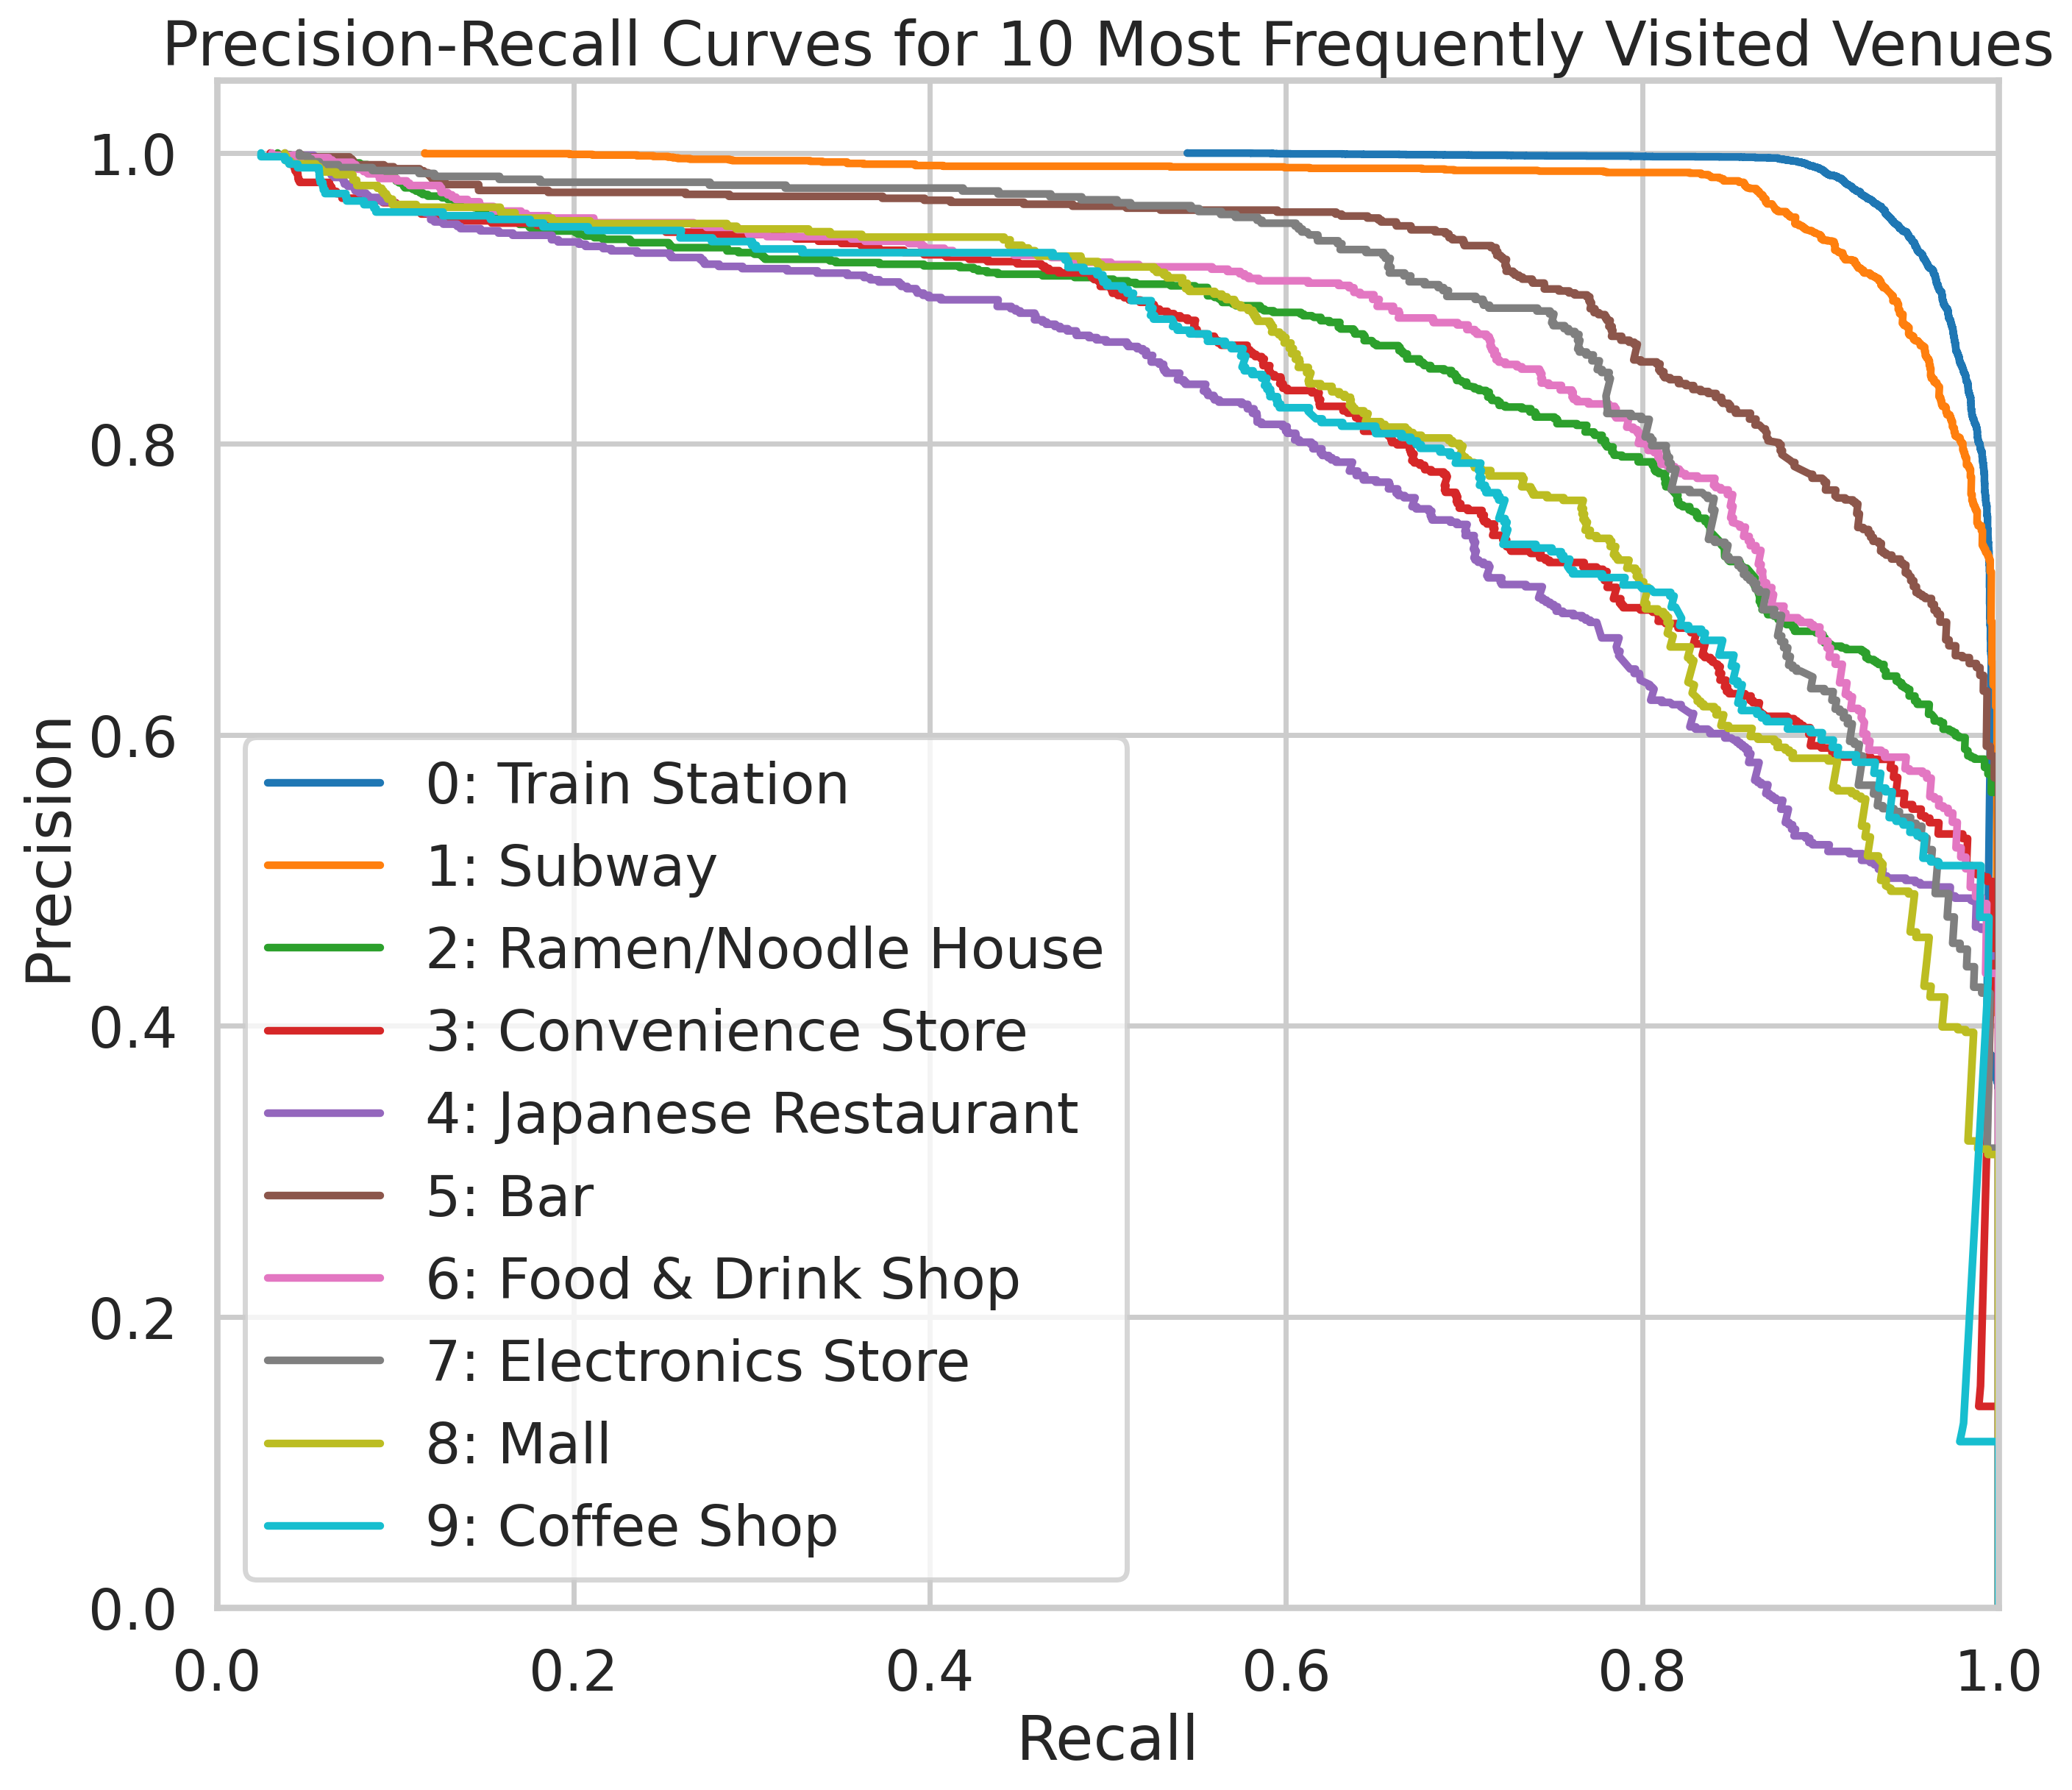

In [15]:
top10_venues = ["0: Train Station", "1: Subway", "2: Ramen/Noodle House",
                "3: Convenience Store", "4: Japanese Restaurant",
                "5: Bar", "6: Food & Drink Shop", "7: Electronics Store",
                "8: Mall", "9: Coffee Shop"]

ytest_binarized = label_binarize(ytest.values, classes=range(247))

precision = dict()
recall = dict()

plt.figure()

for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(
        ytest_binarized[:, i], ytest_probs[:, i])
    plt.plot(precision[i], recall[i])

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(top10_venues)
plt.title("Precision-Recall Curves for 10 Most Frequently Visited Venues");

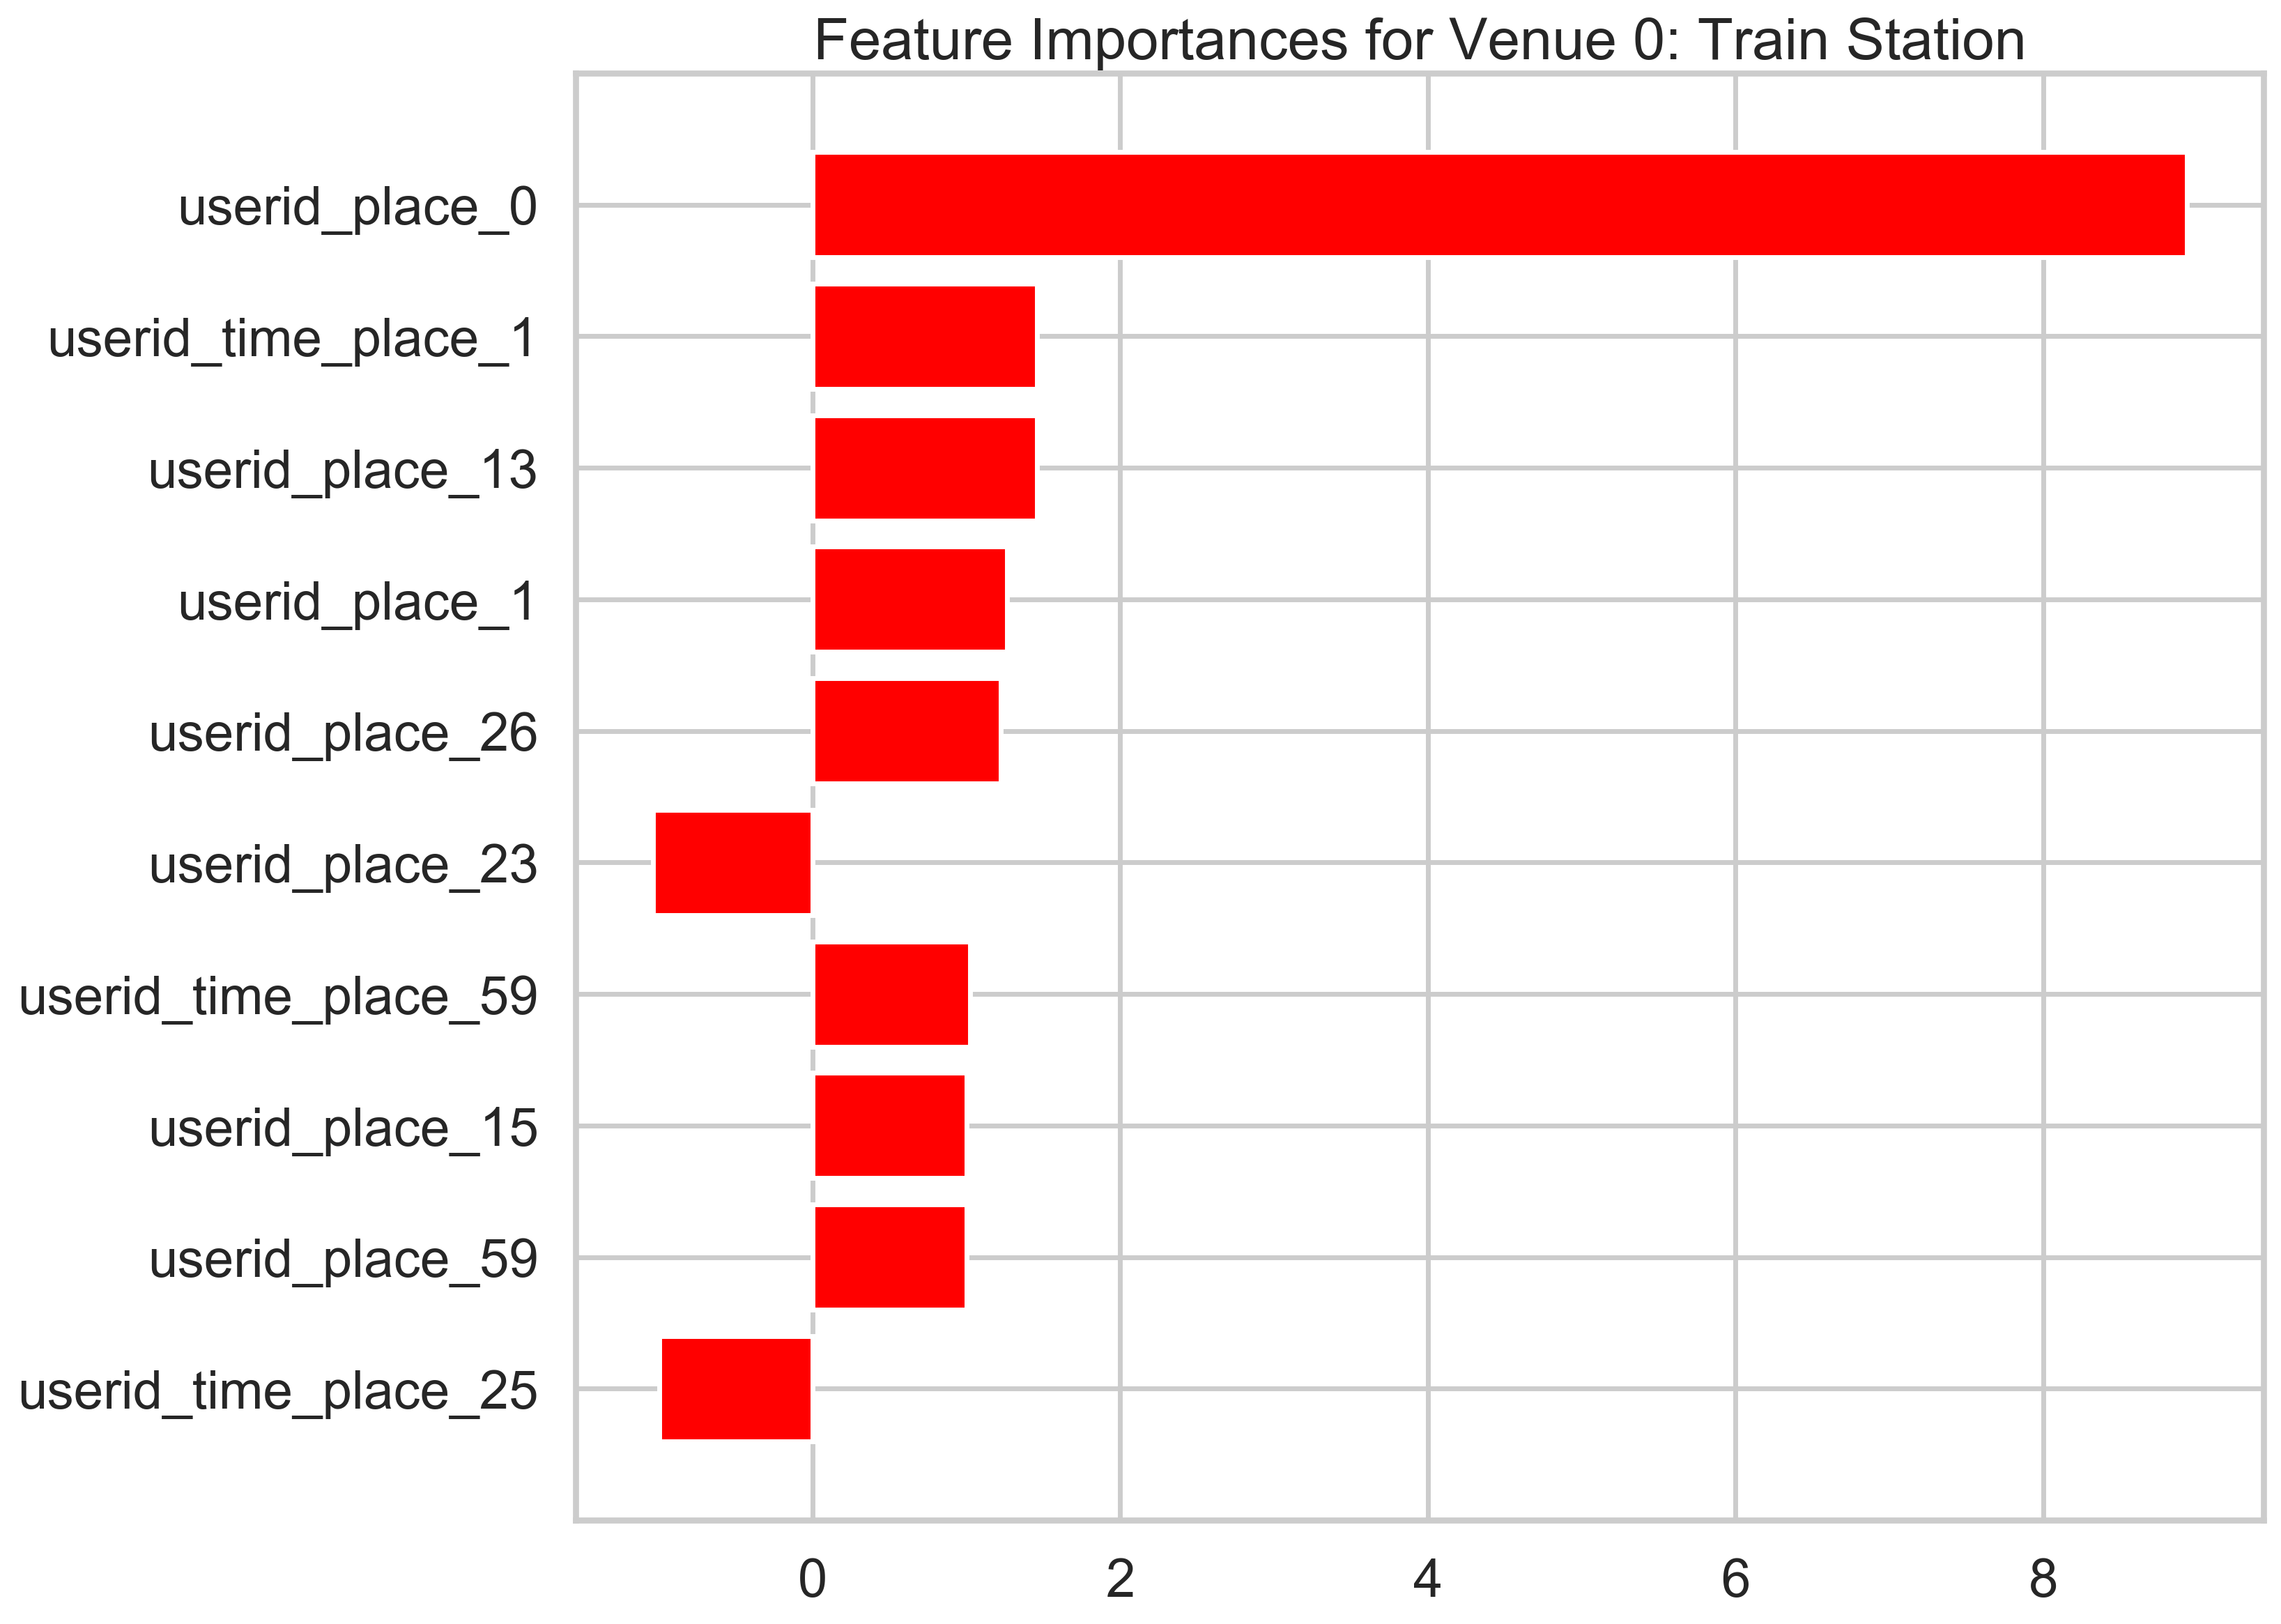

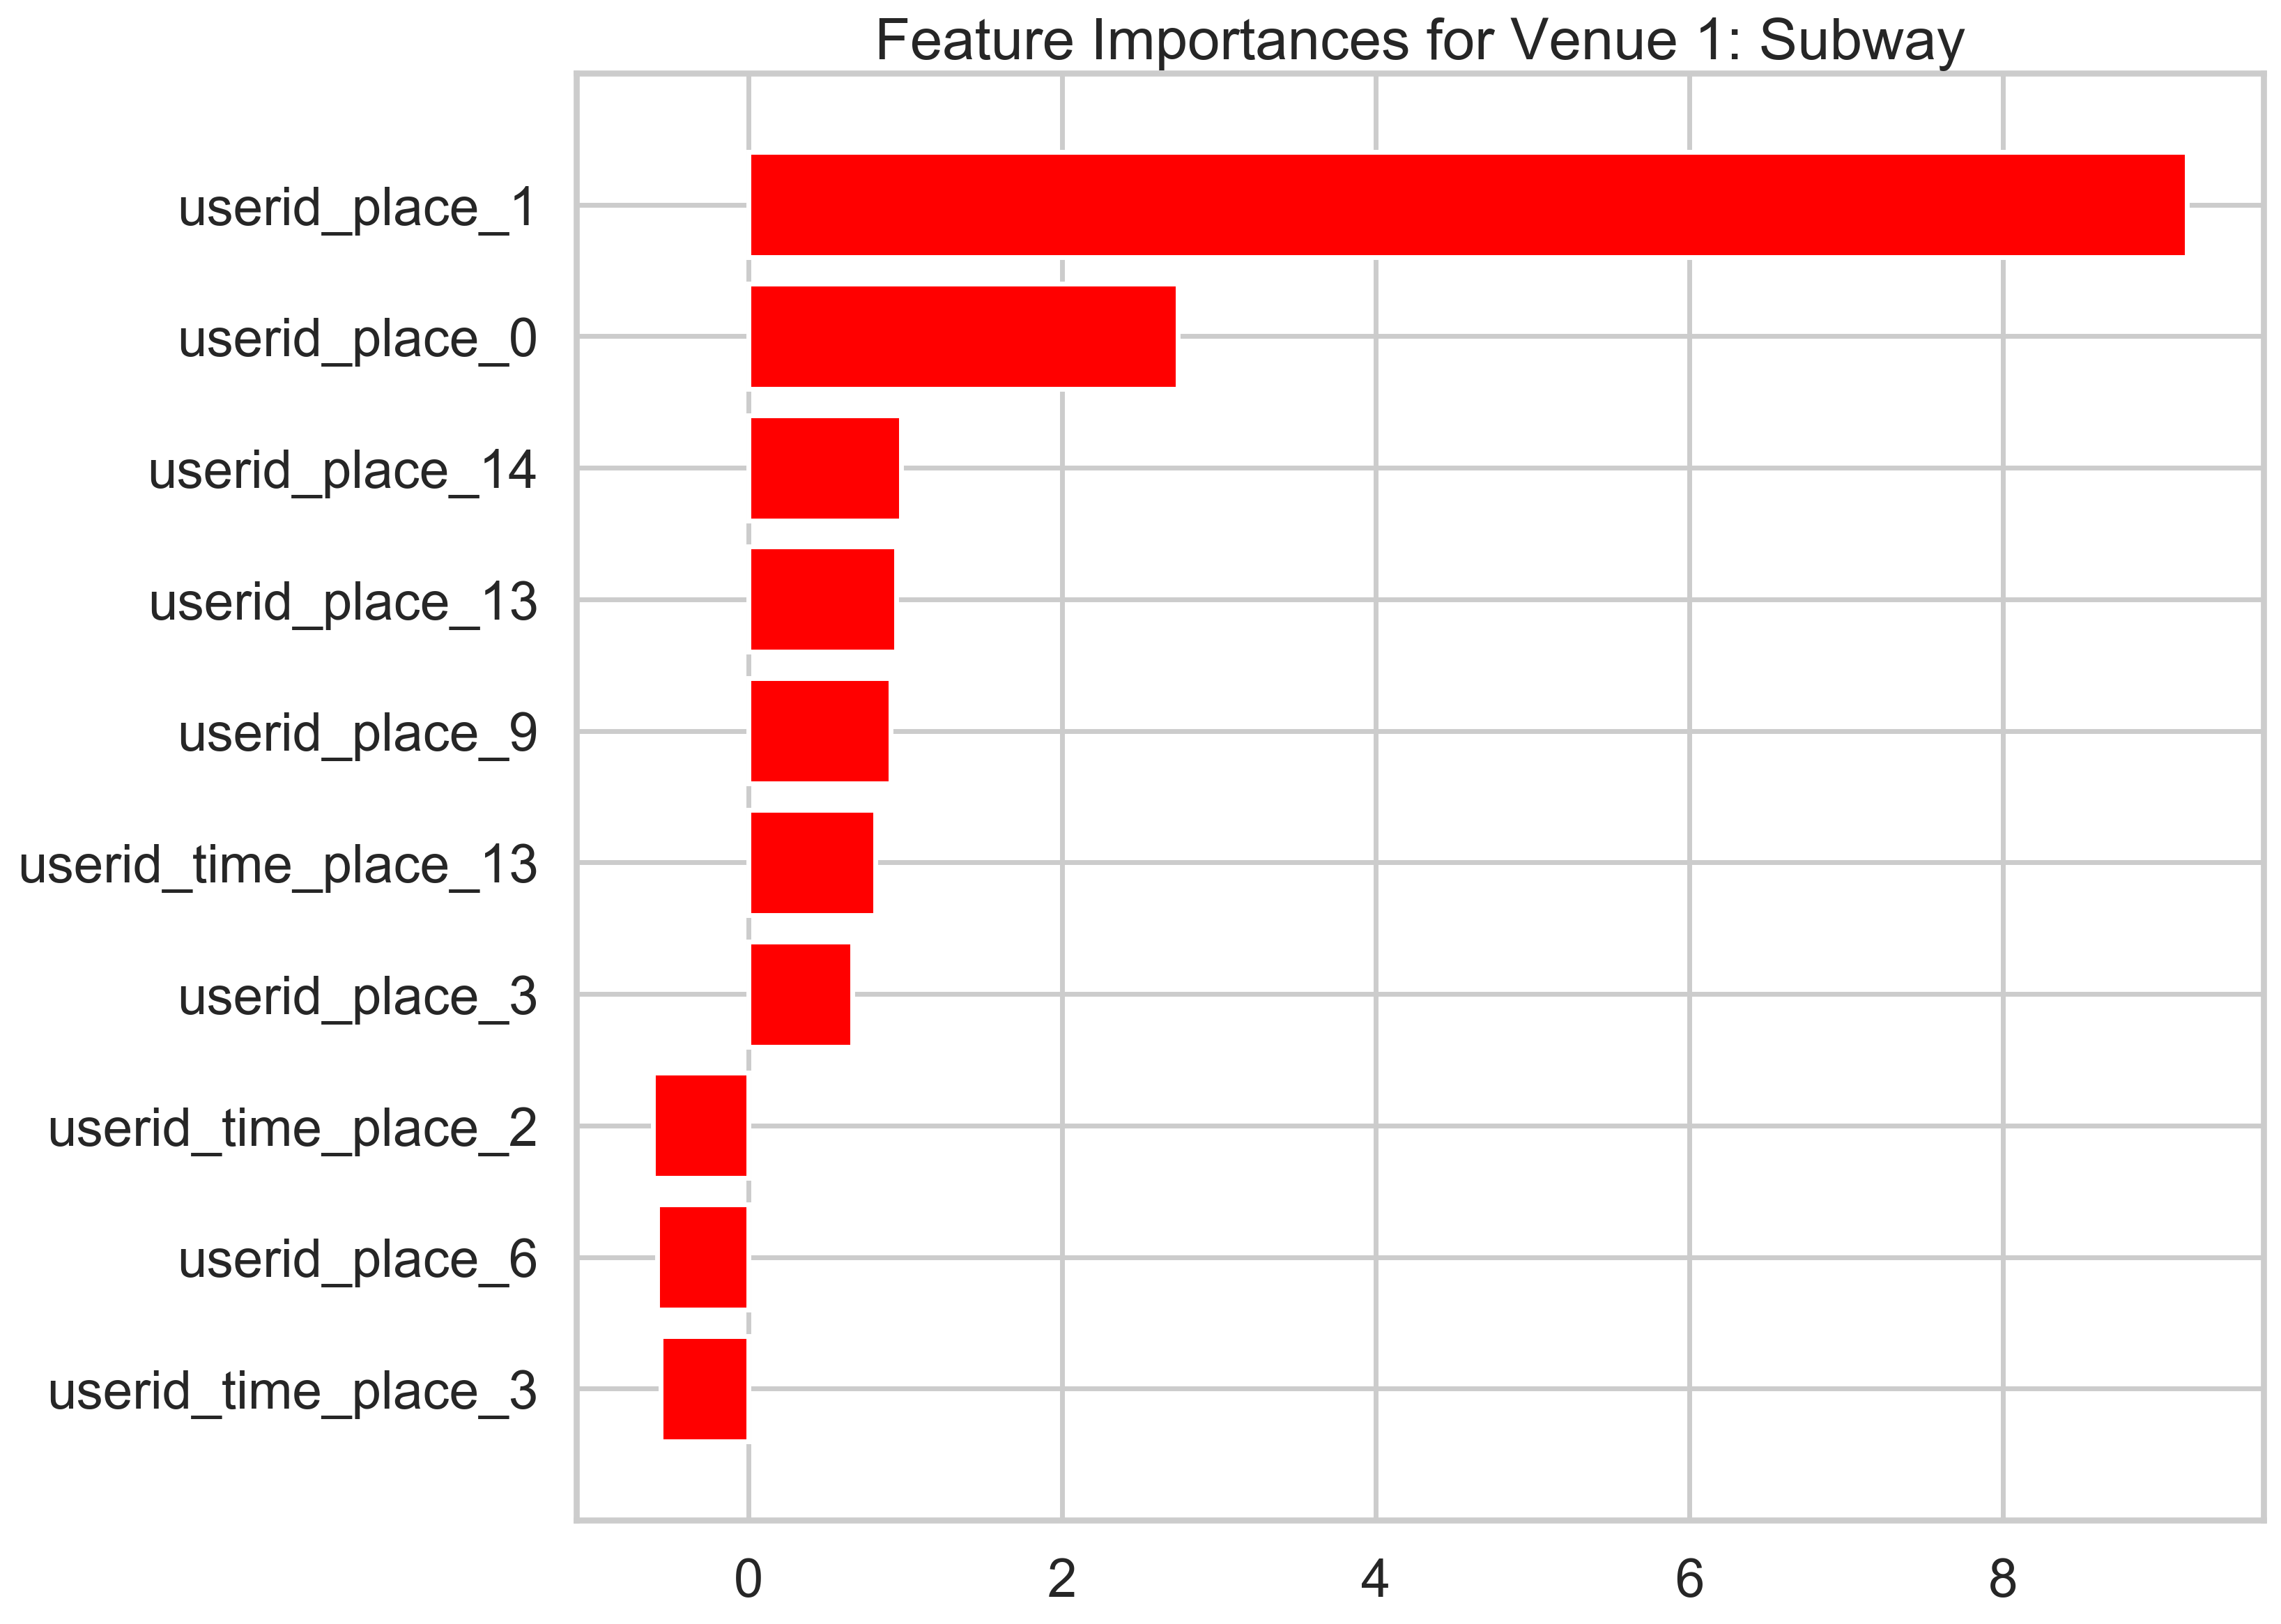

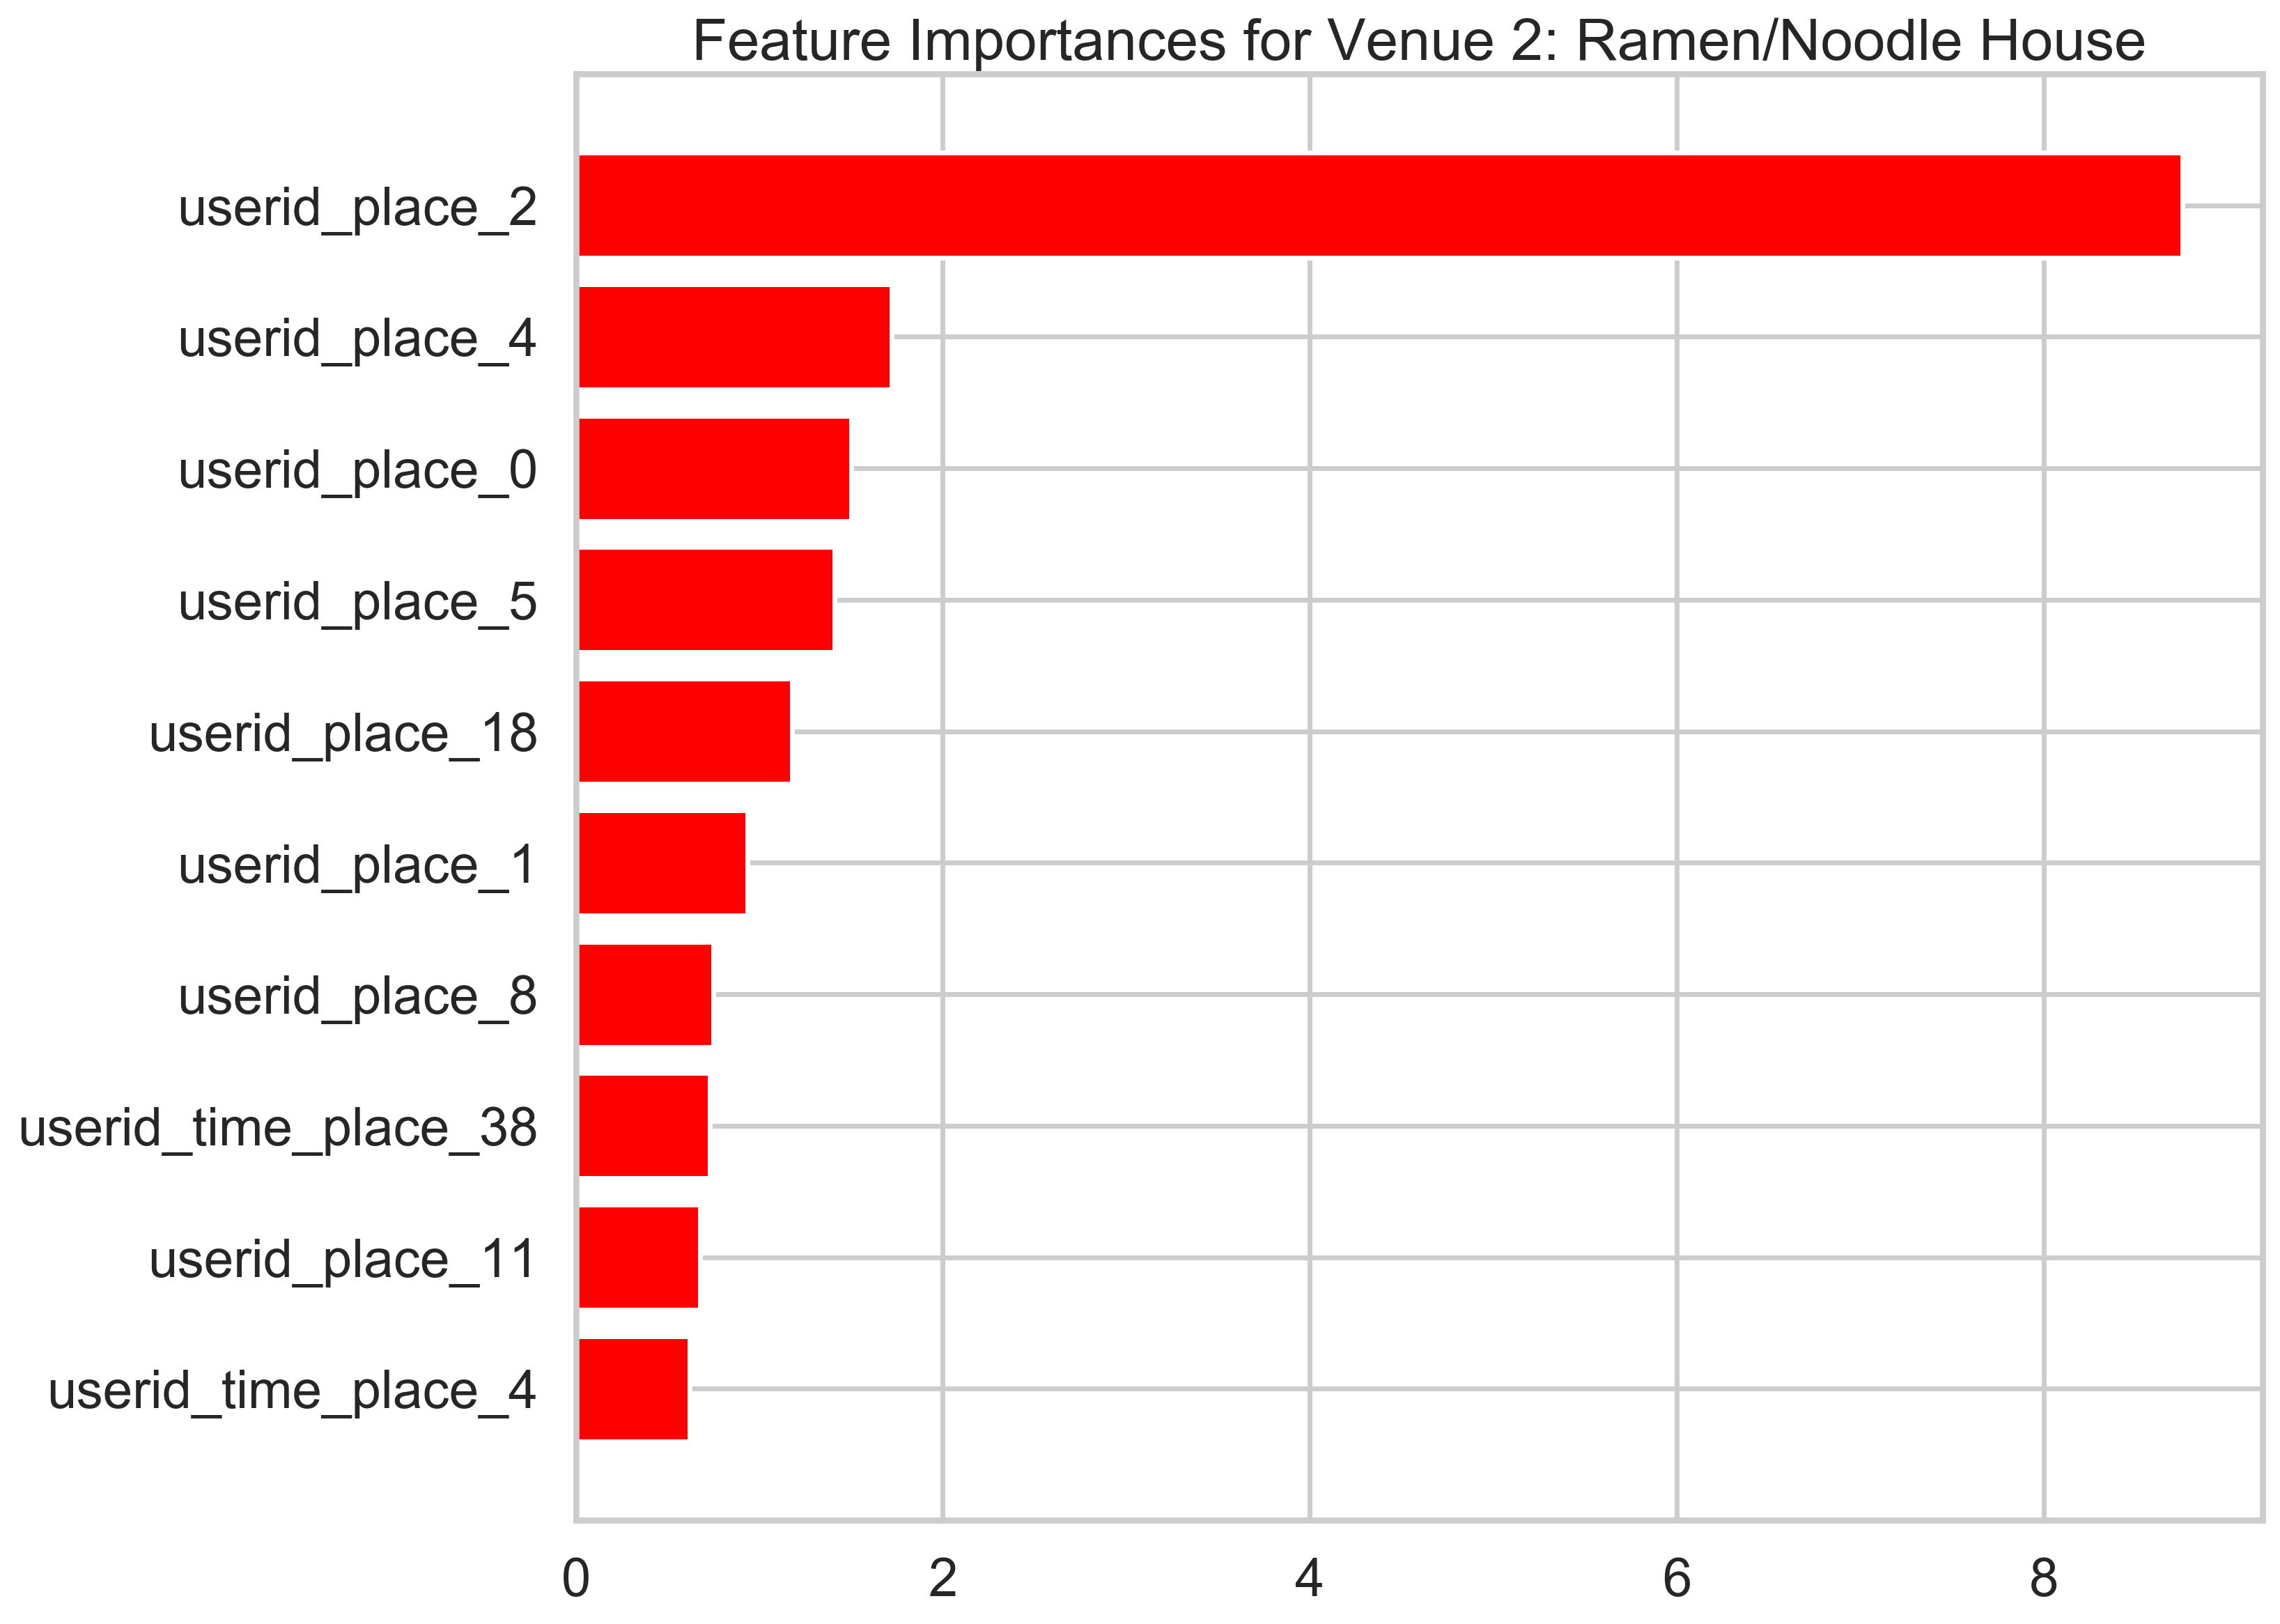

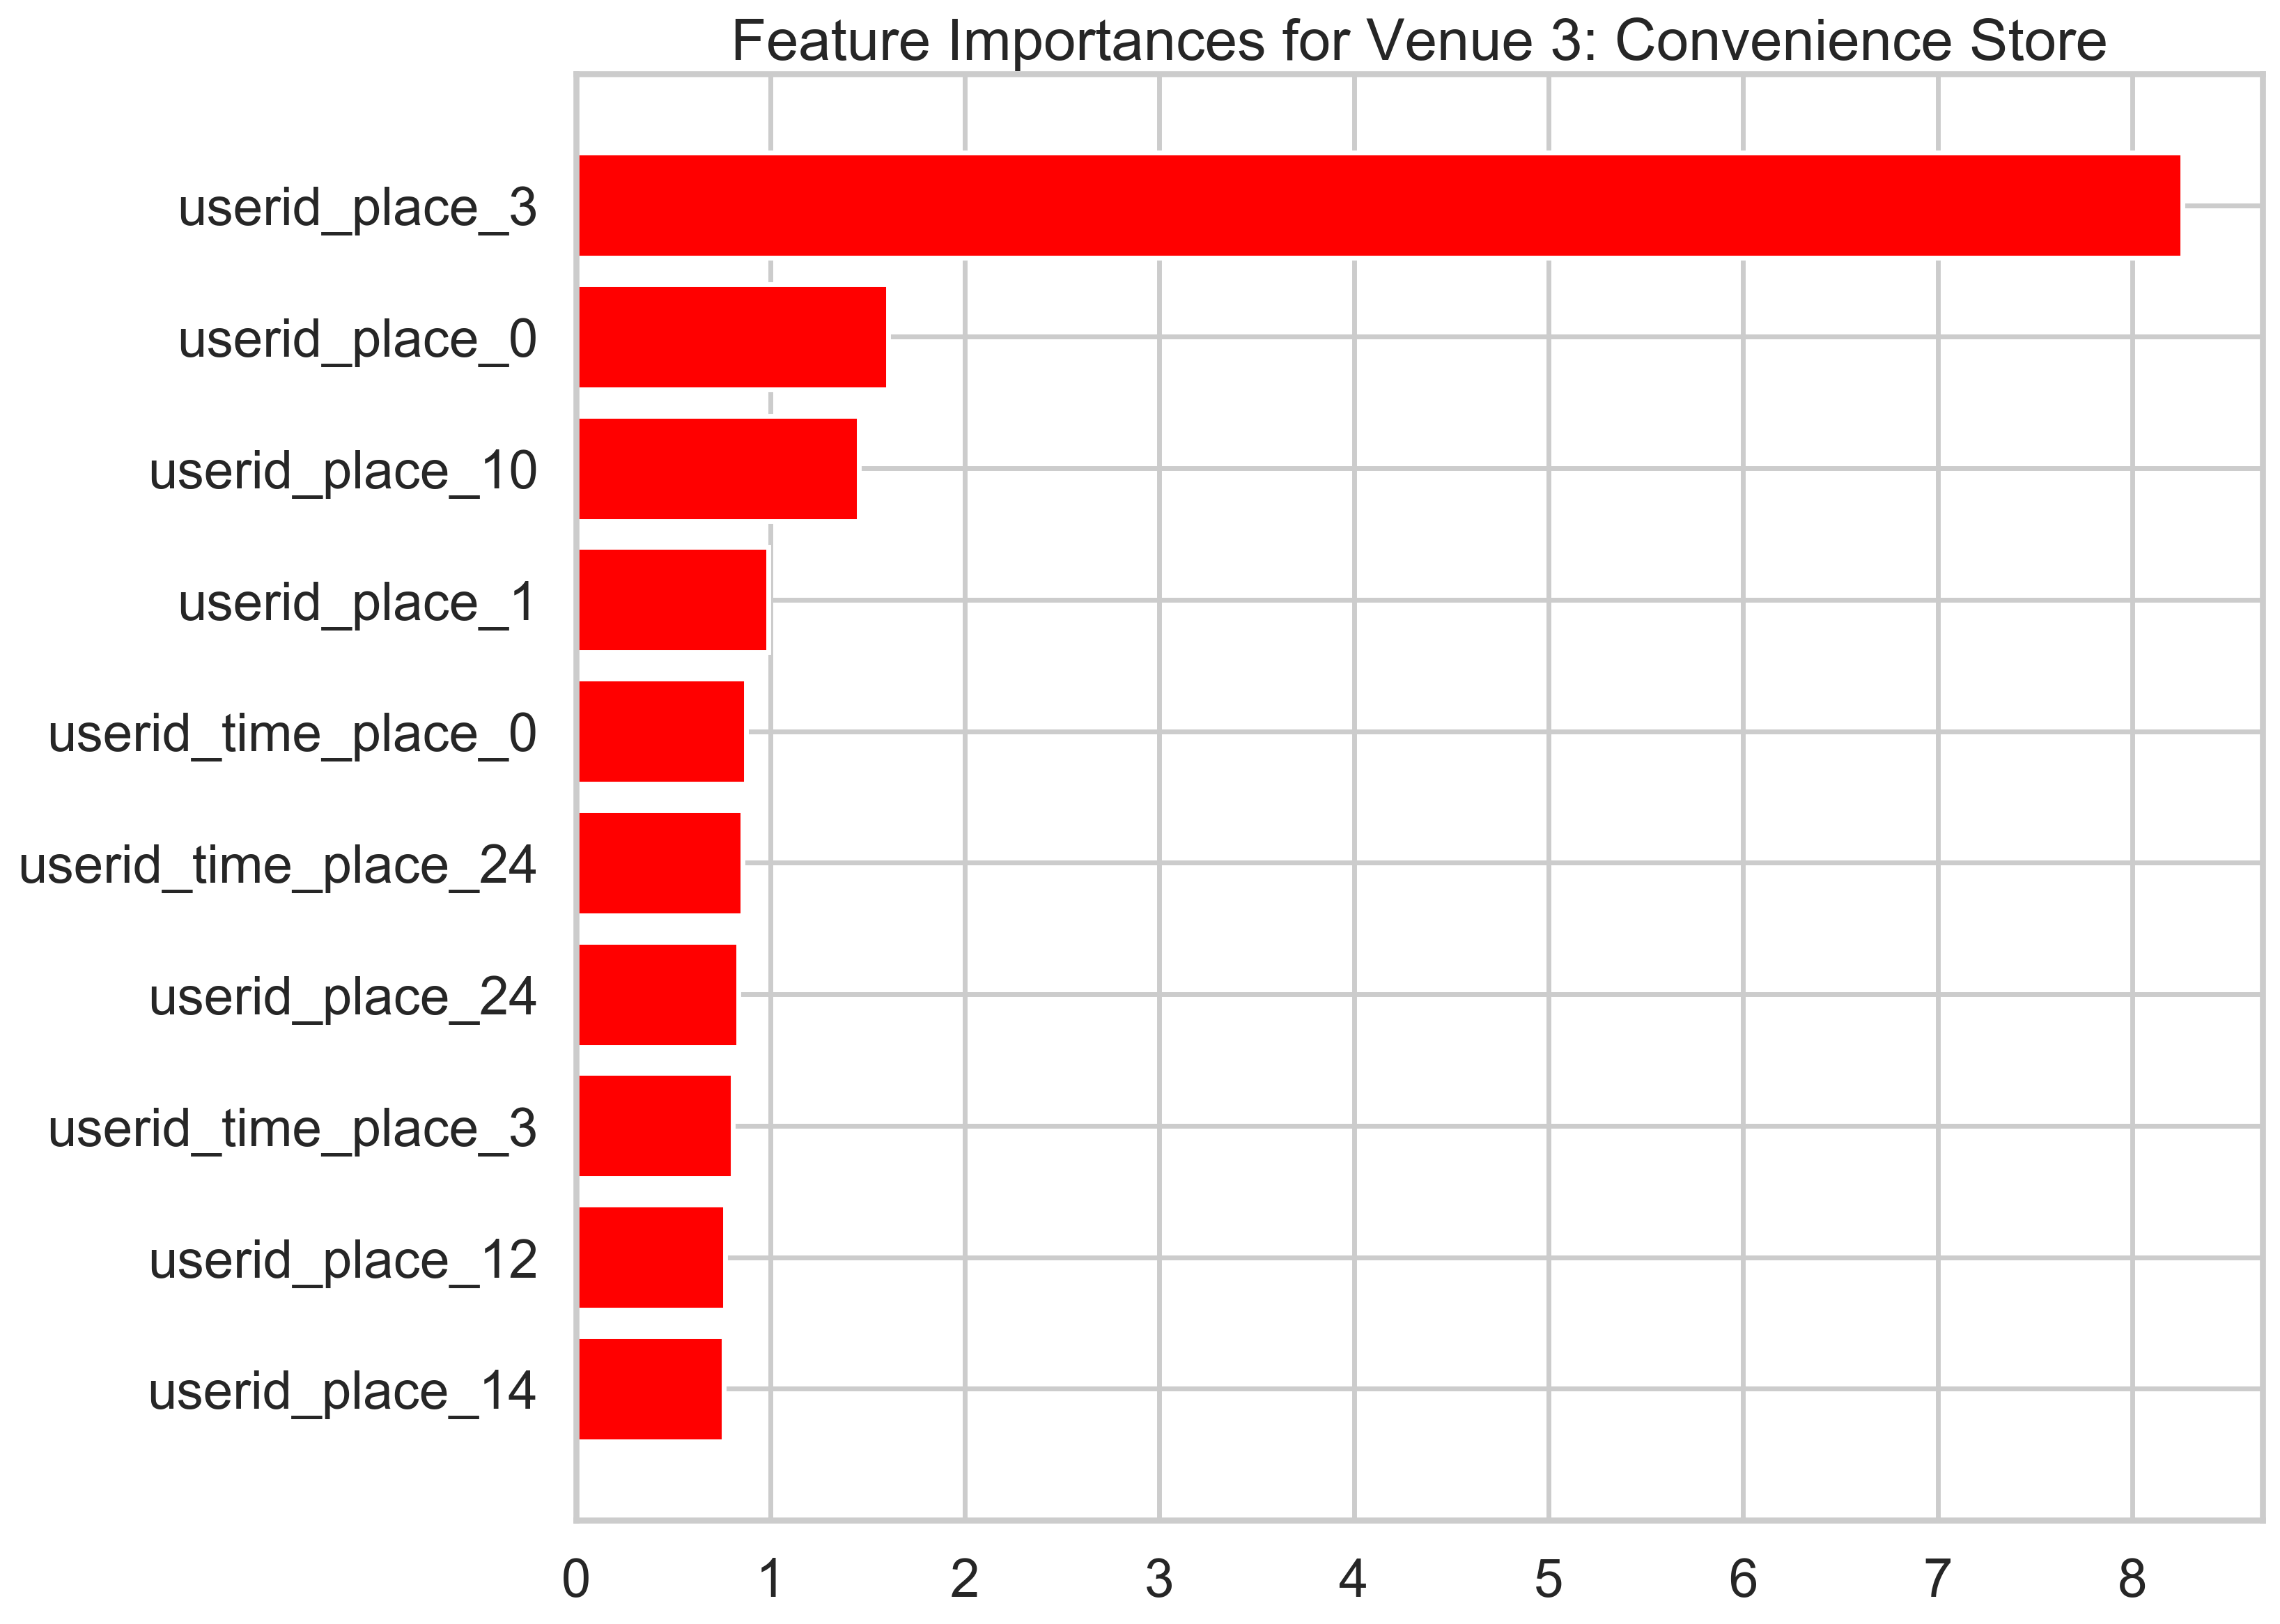

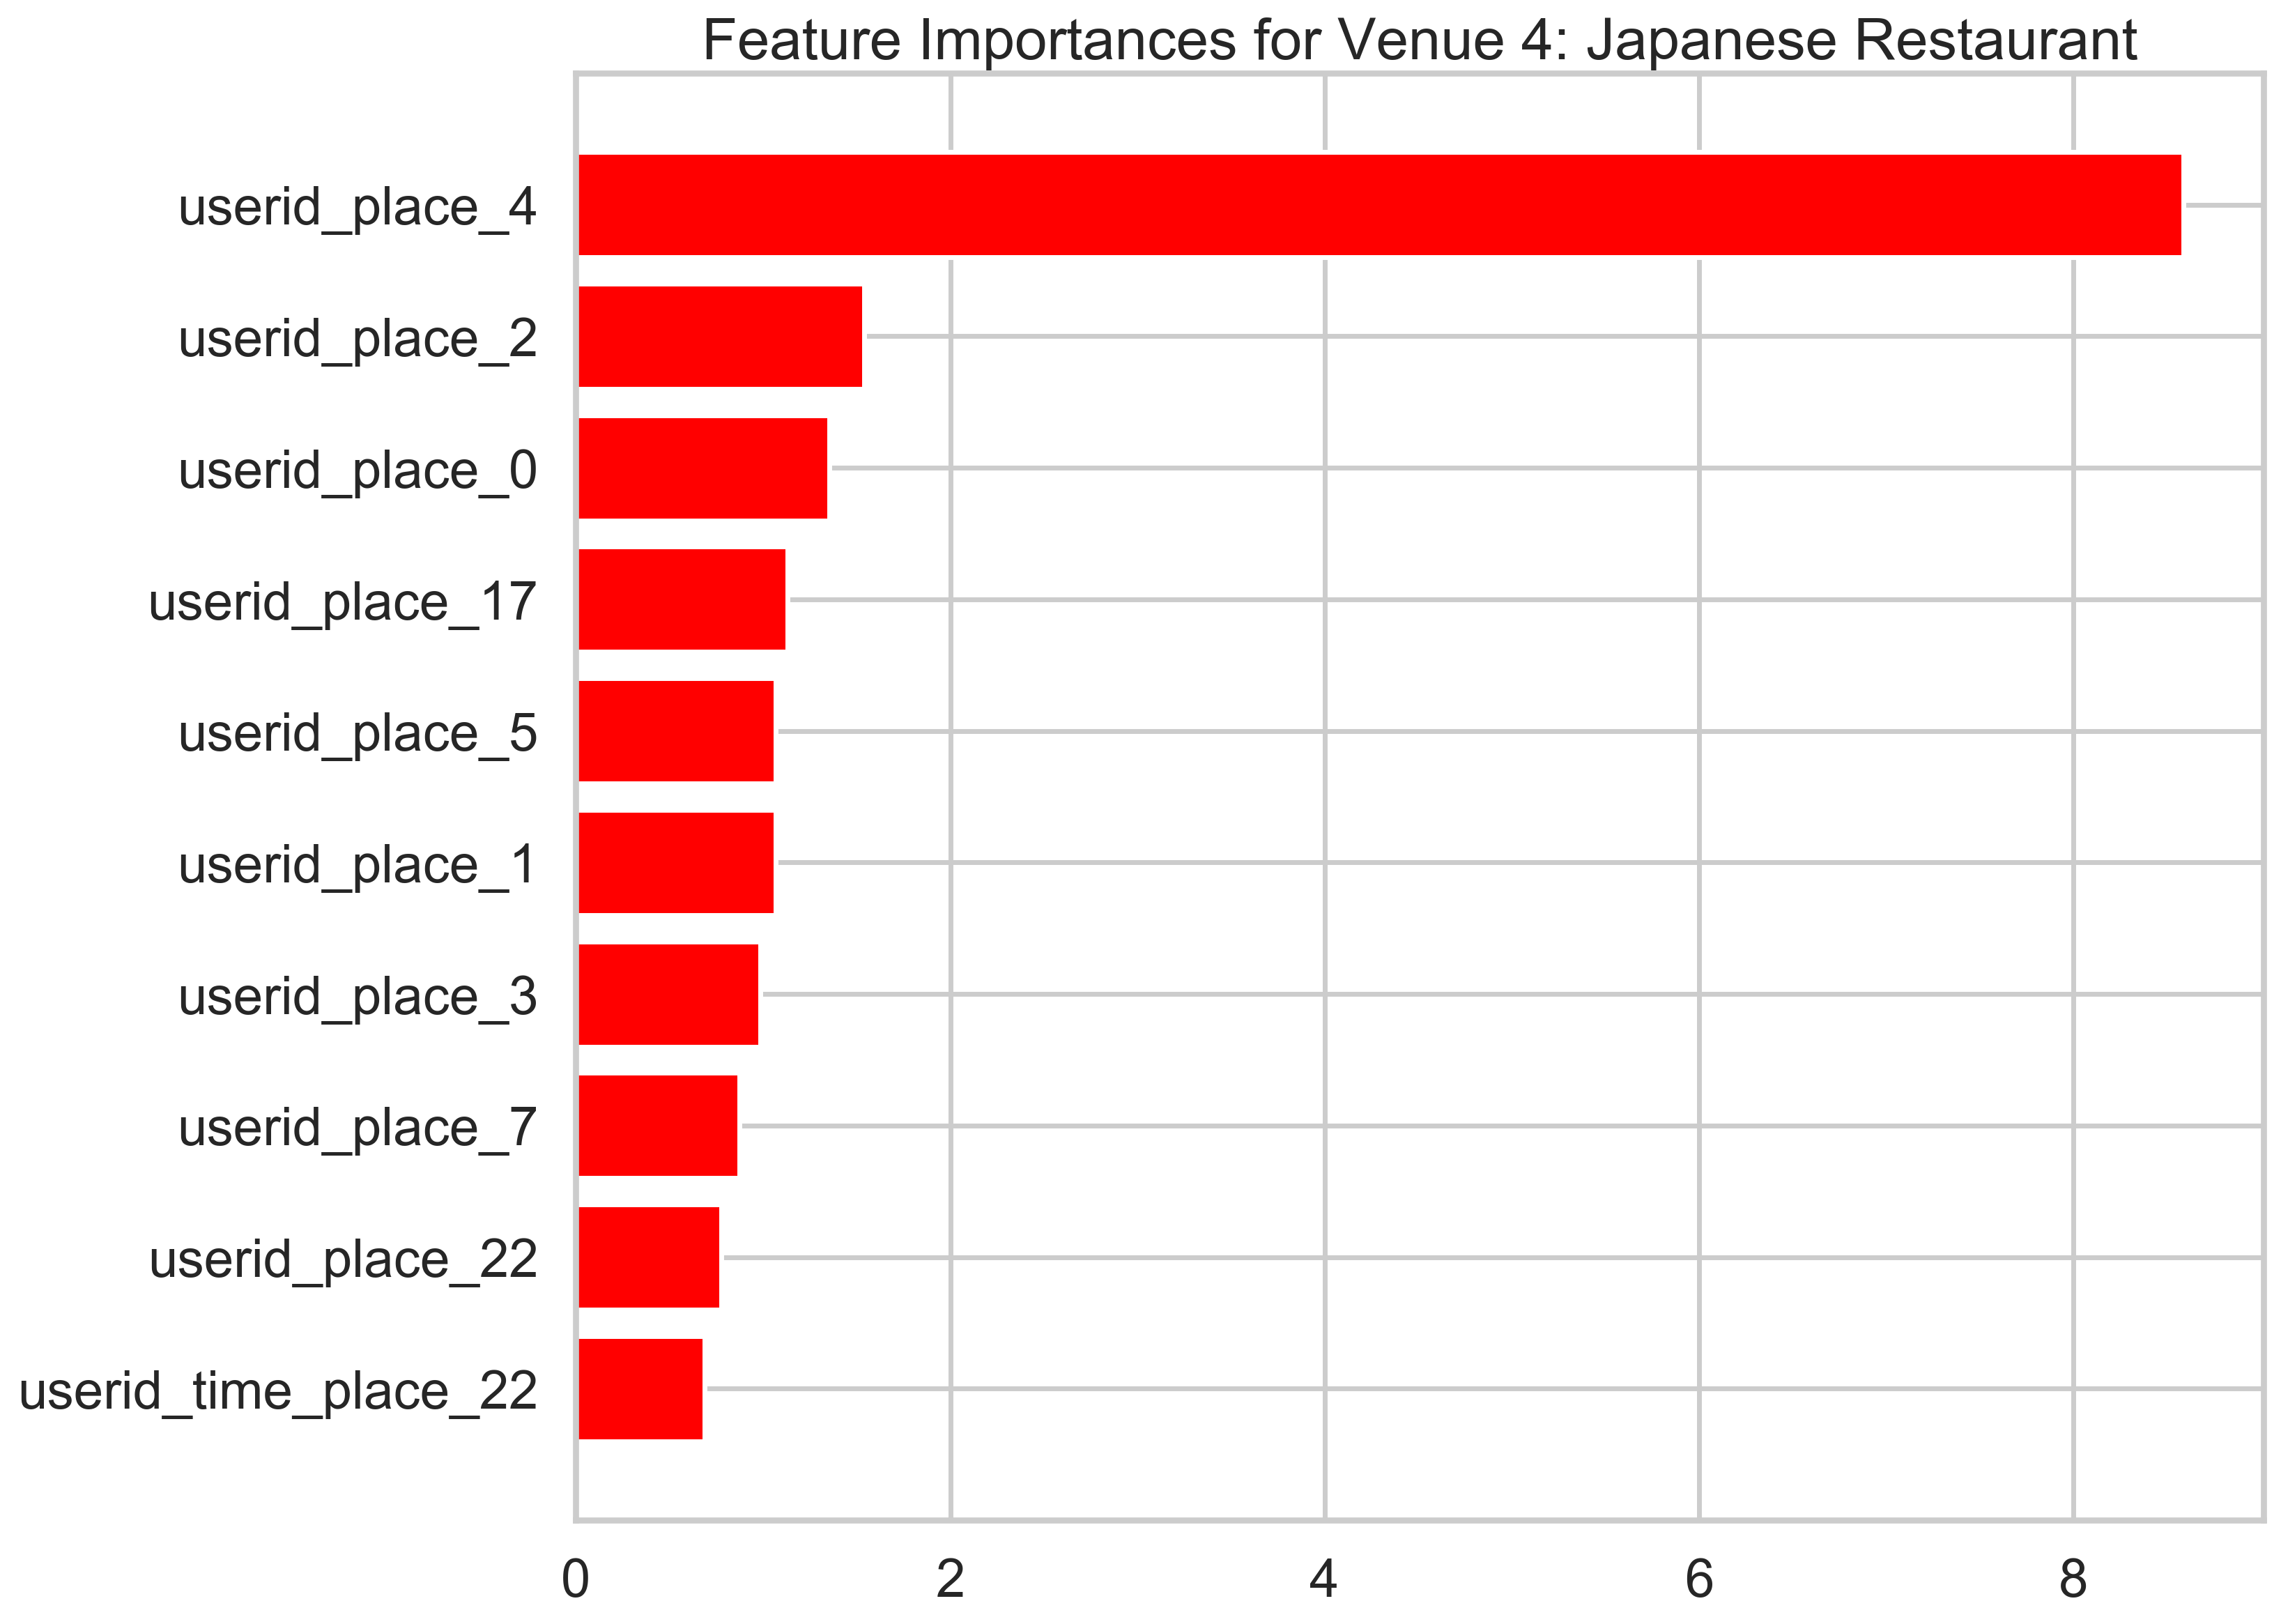

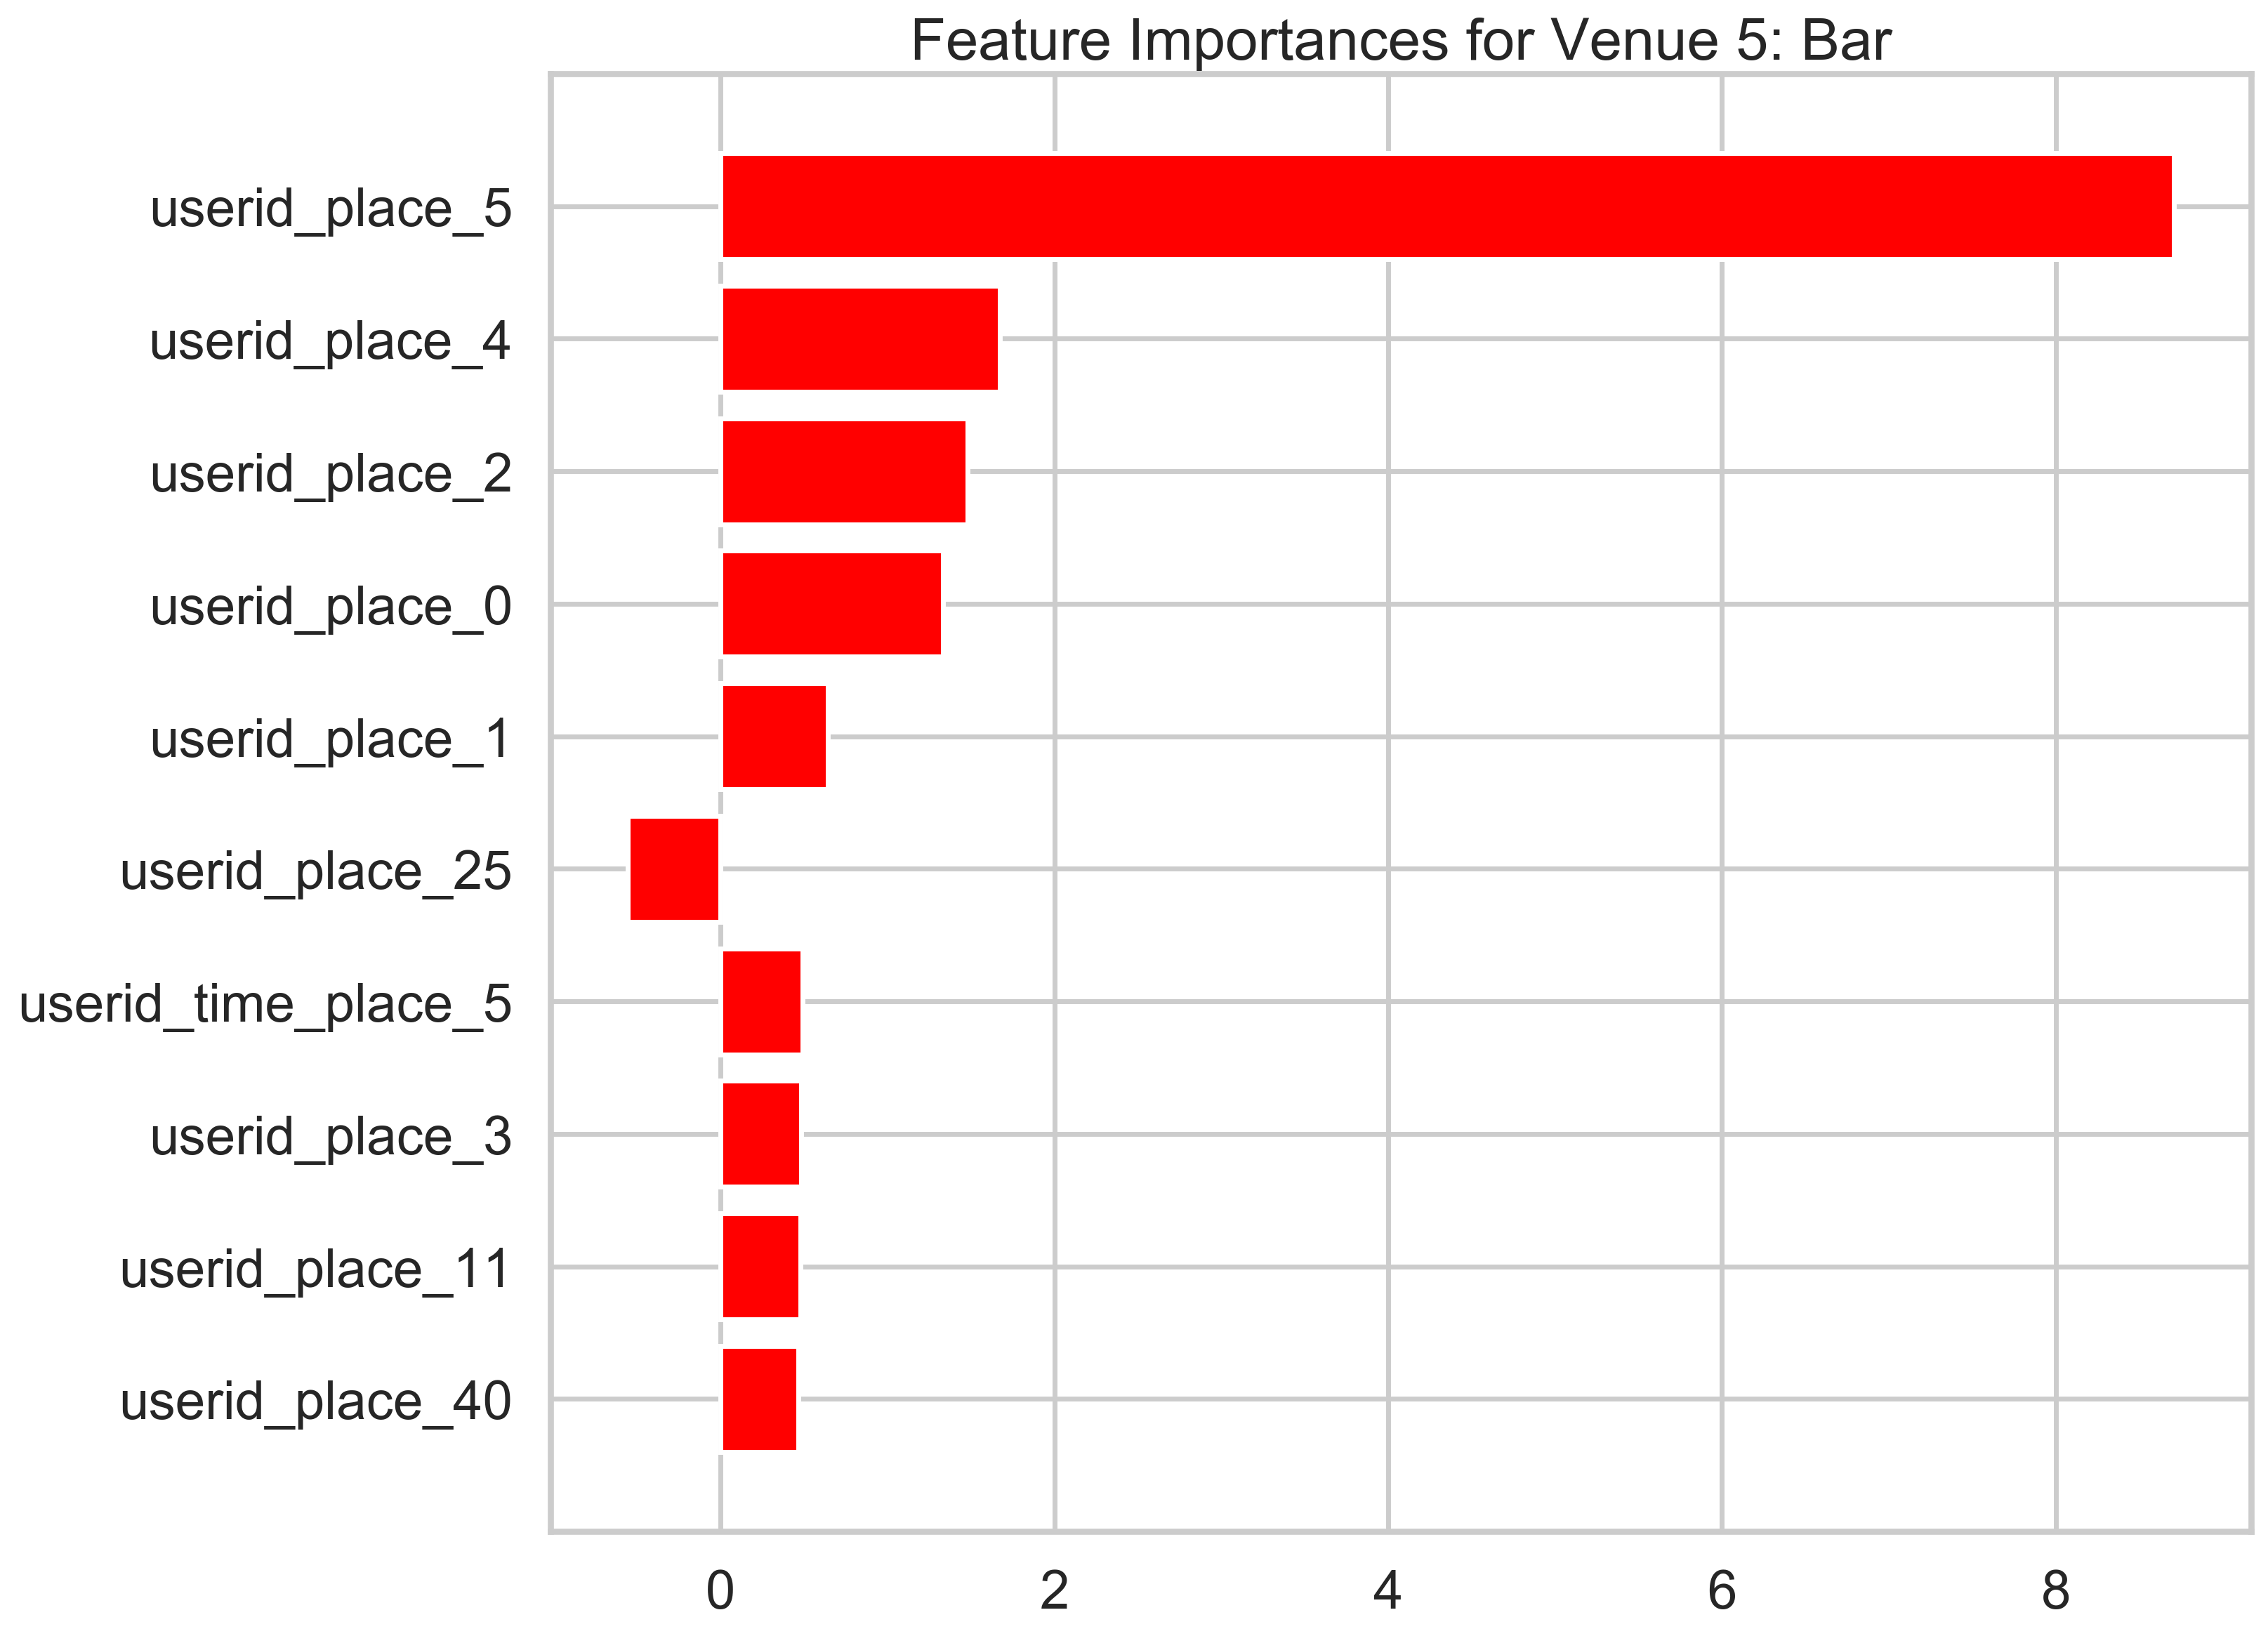

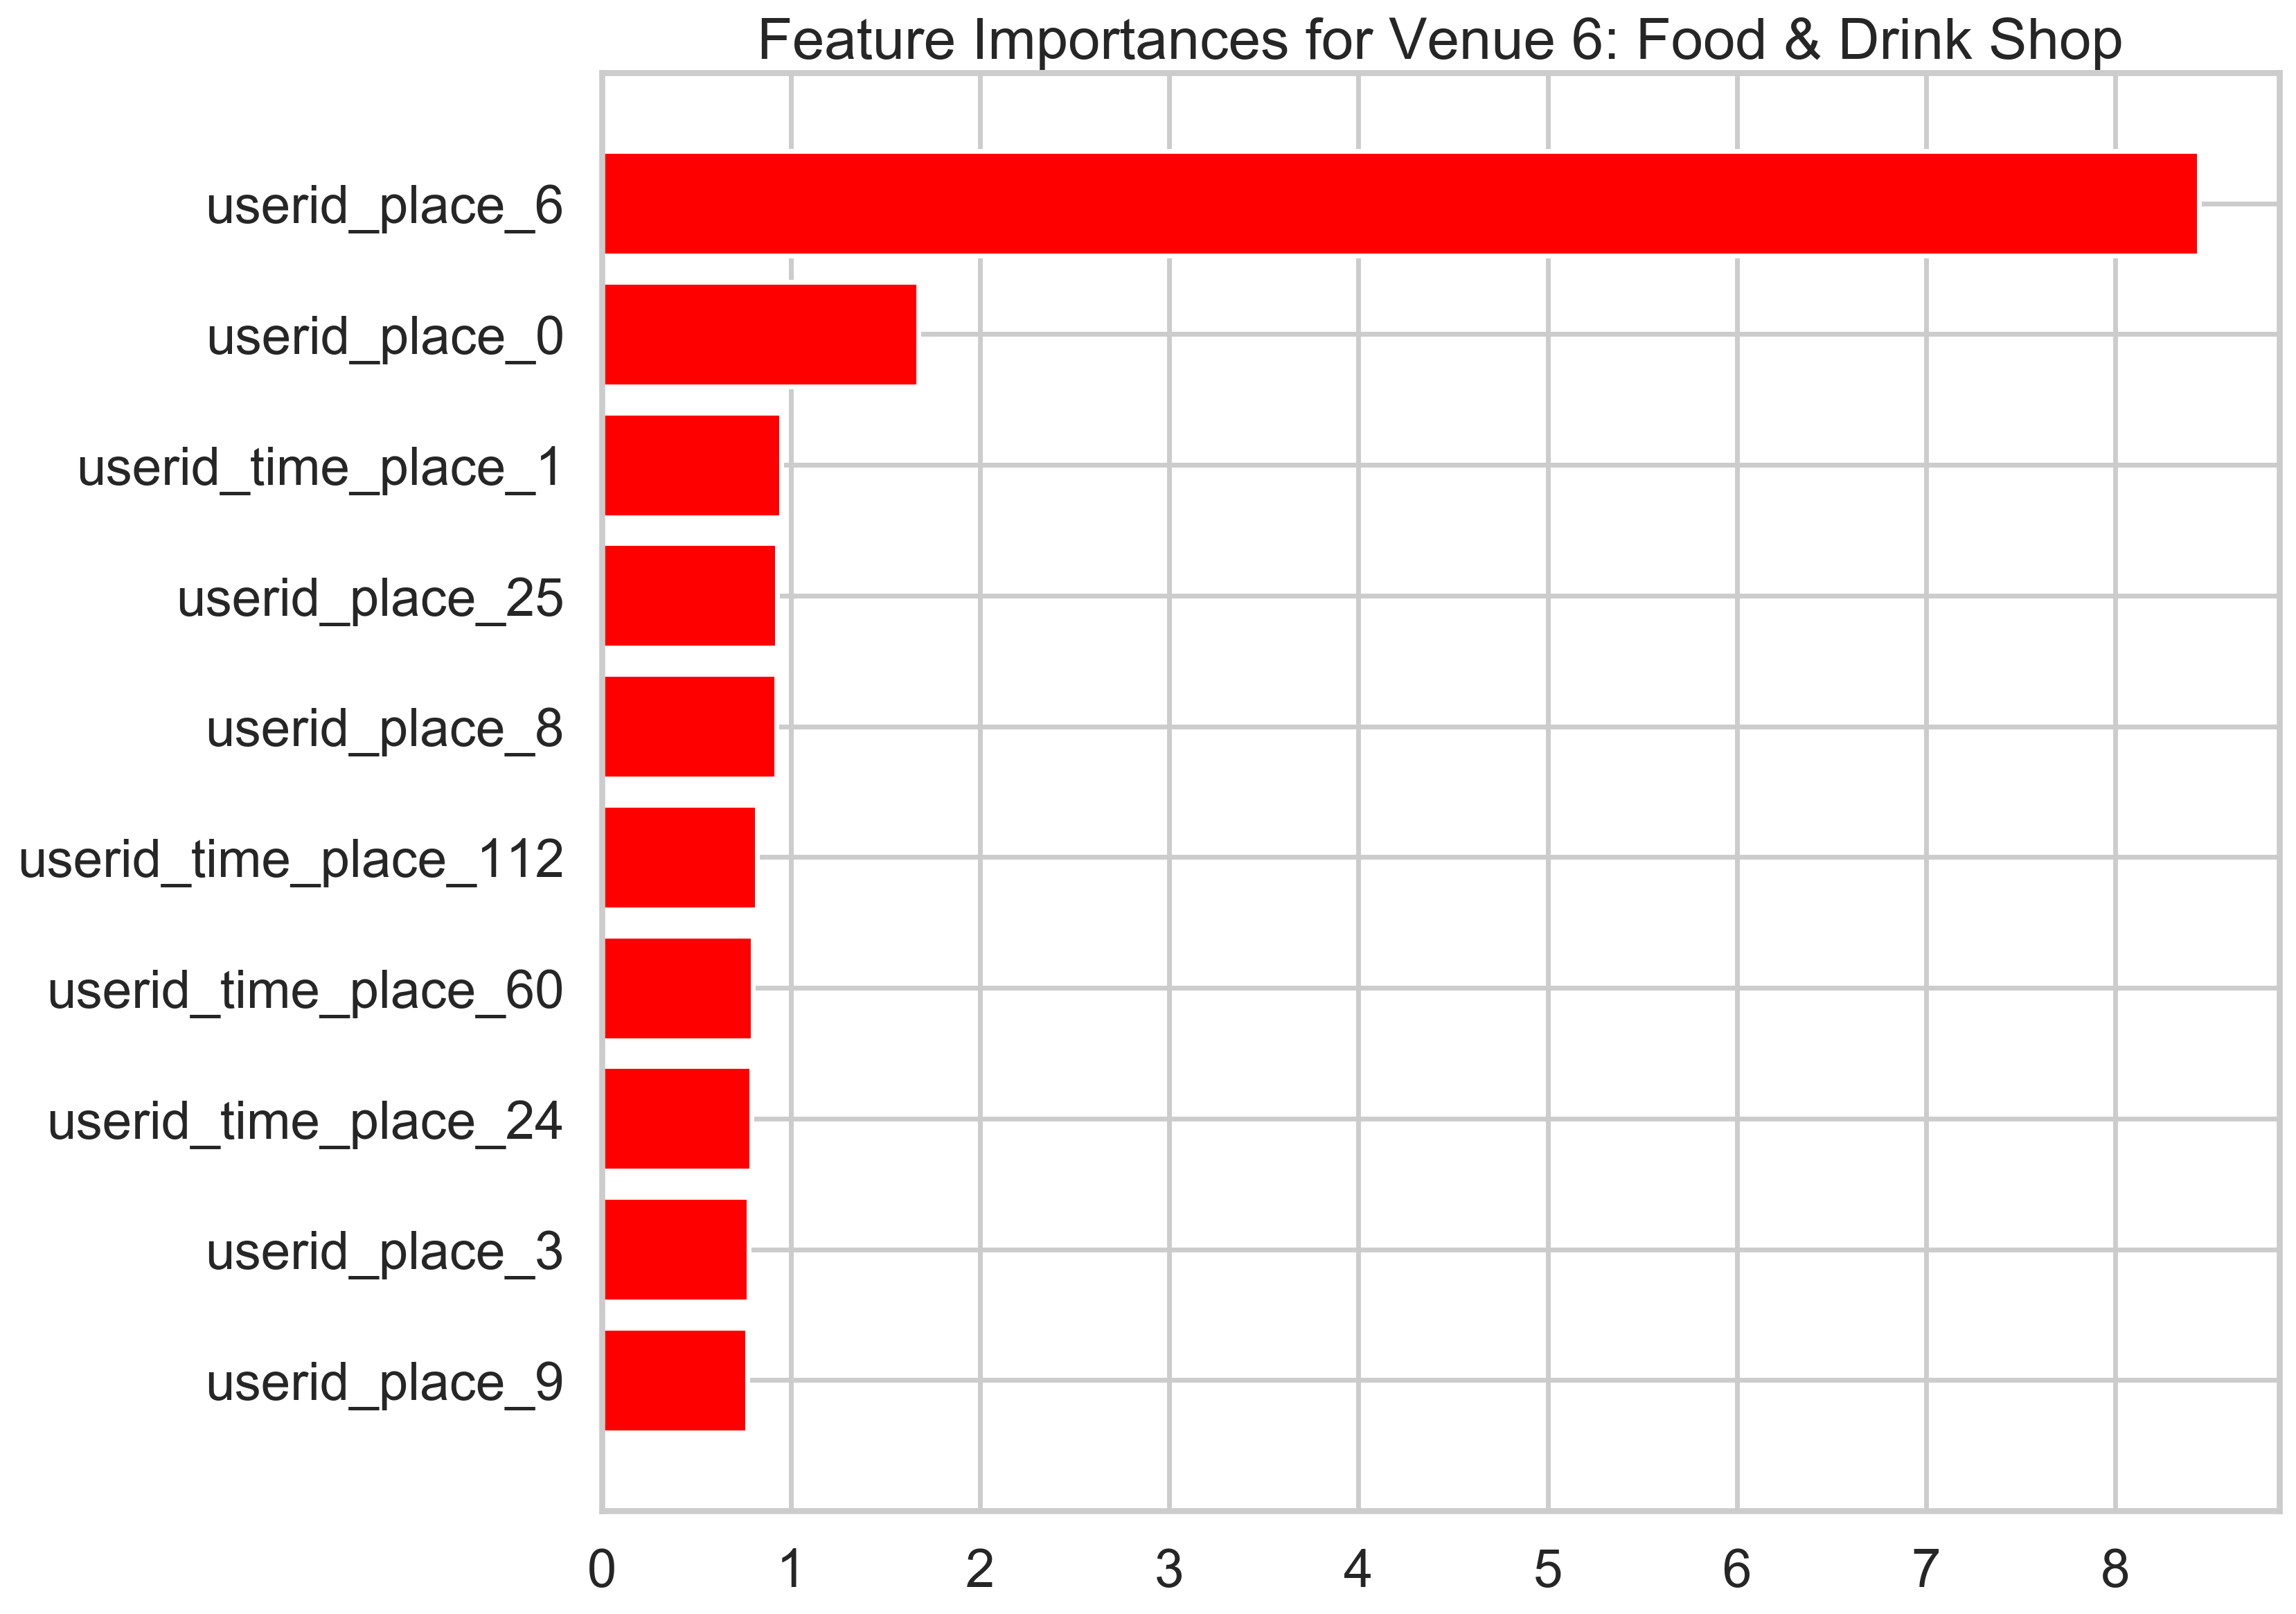

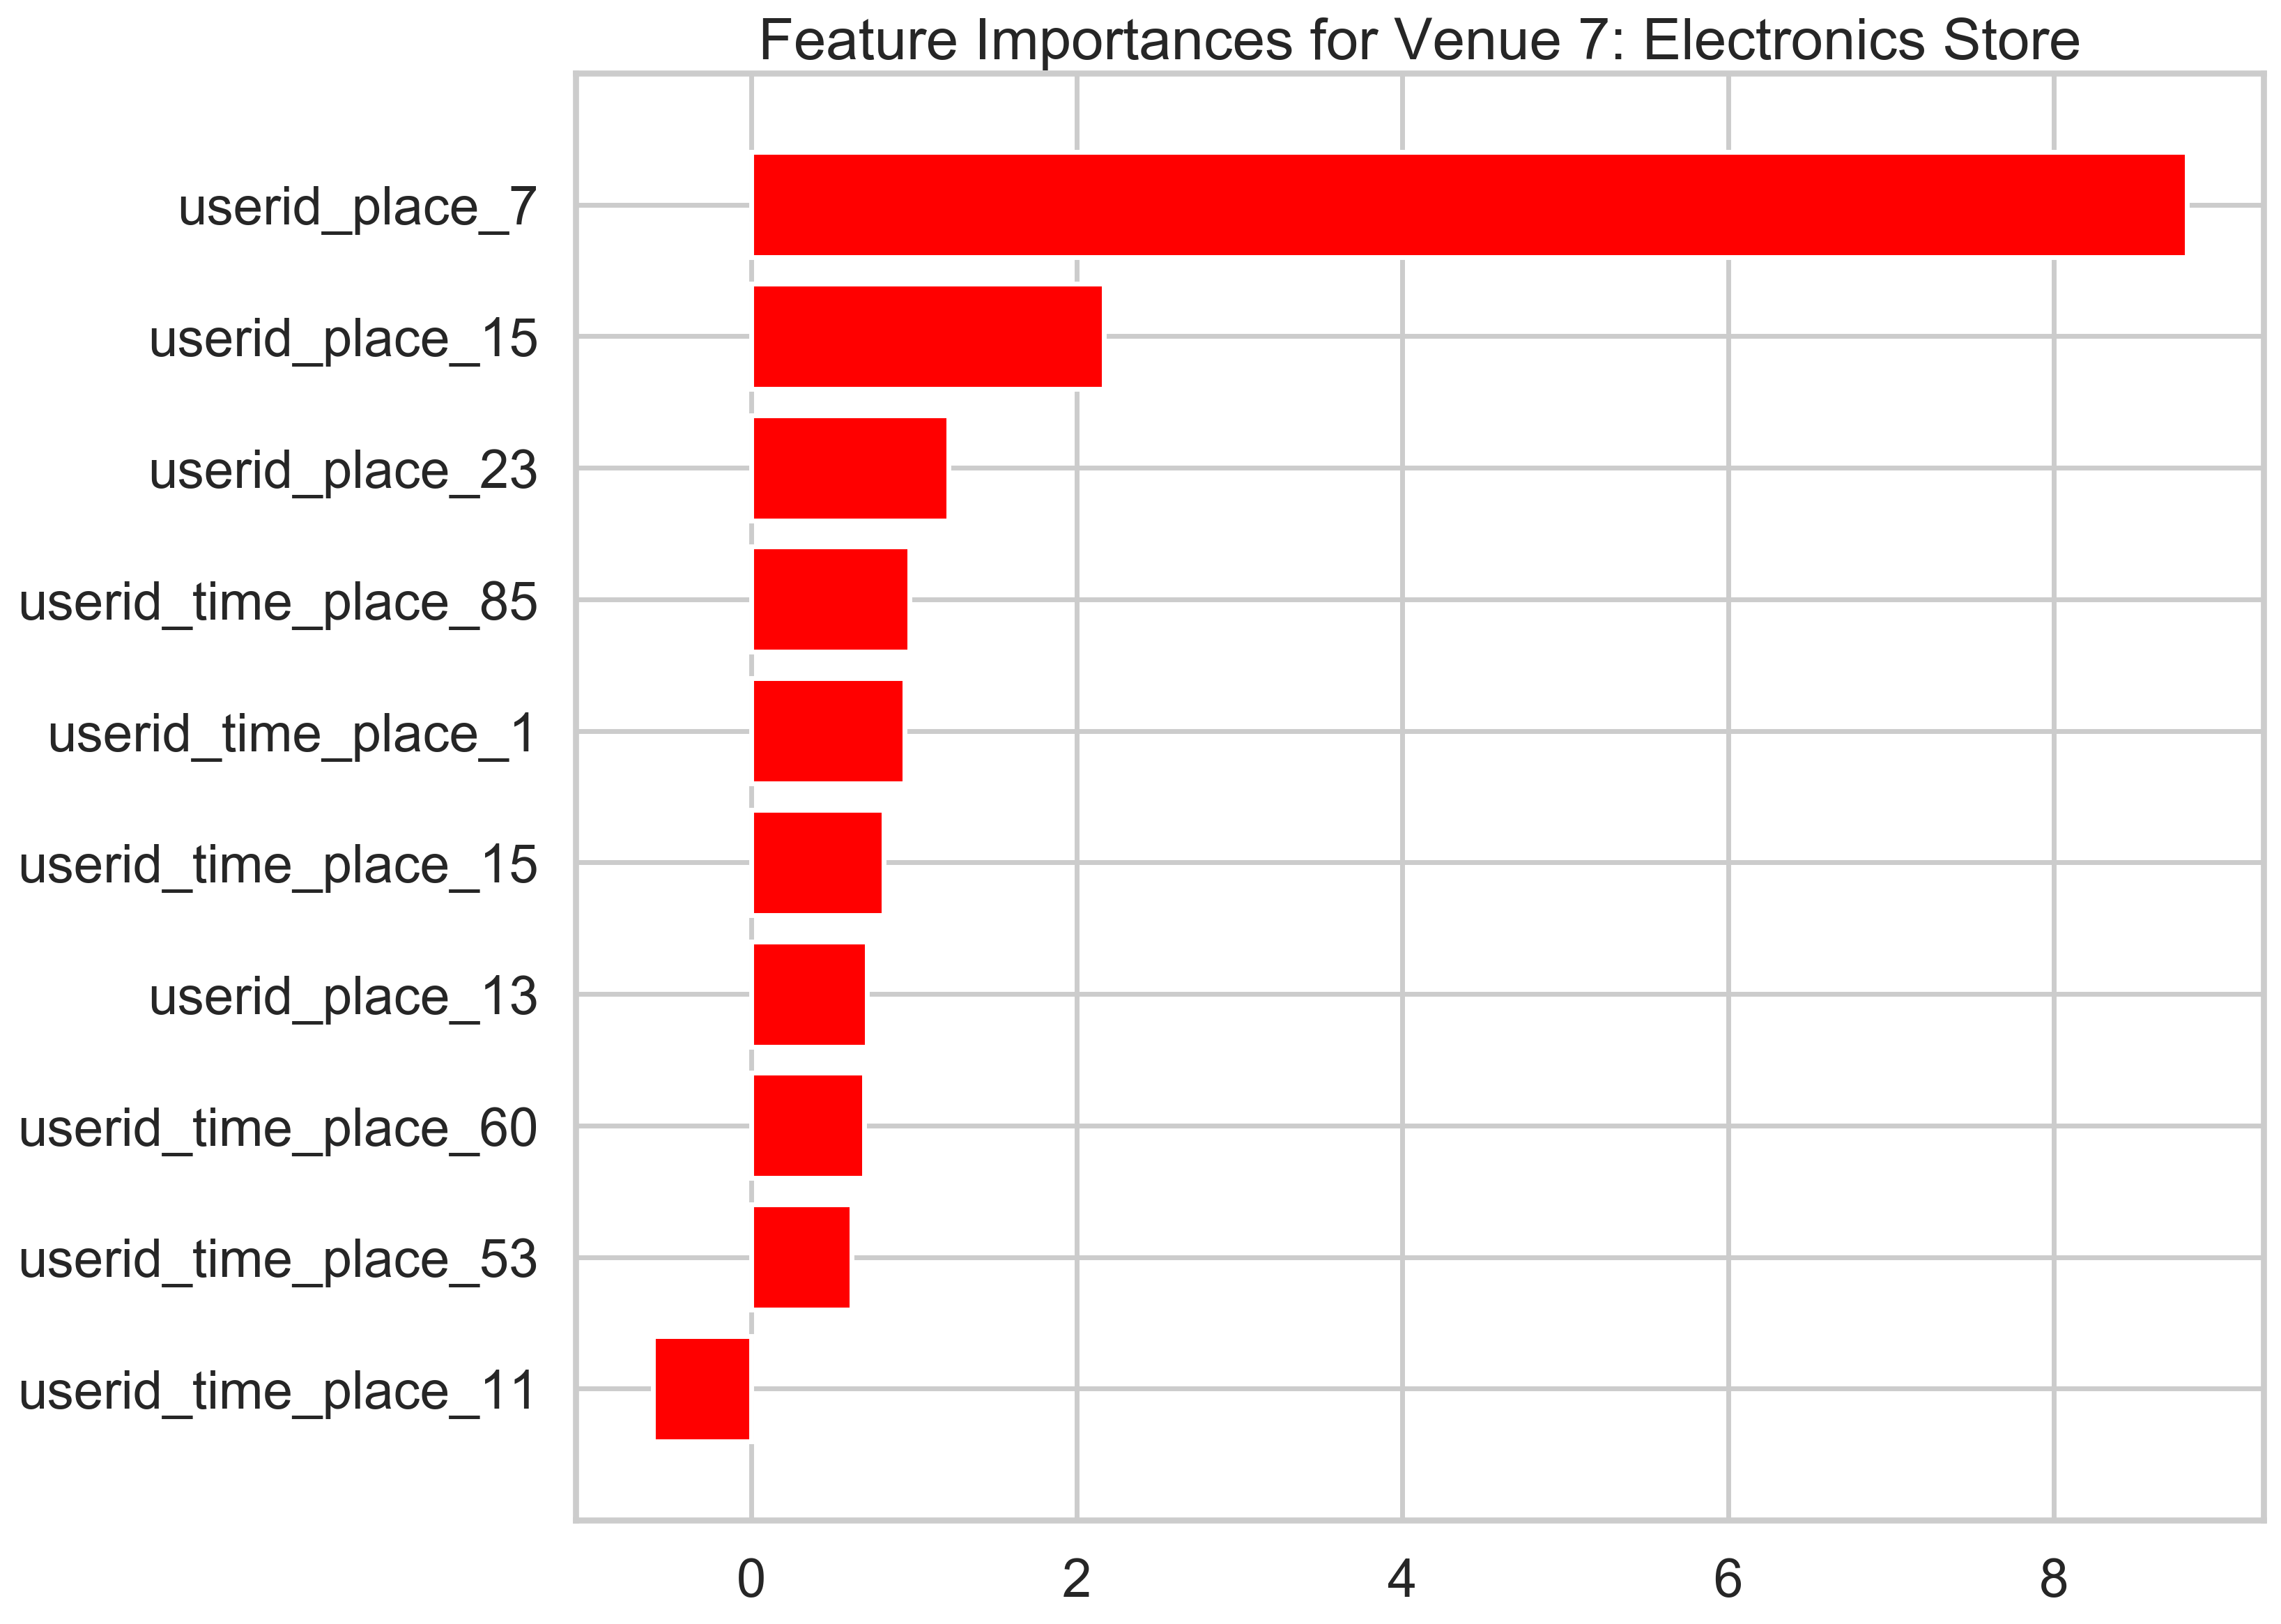

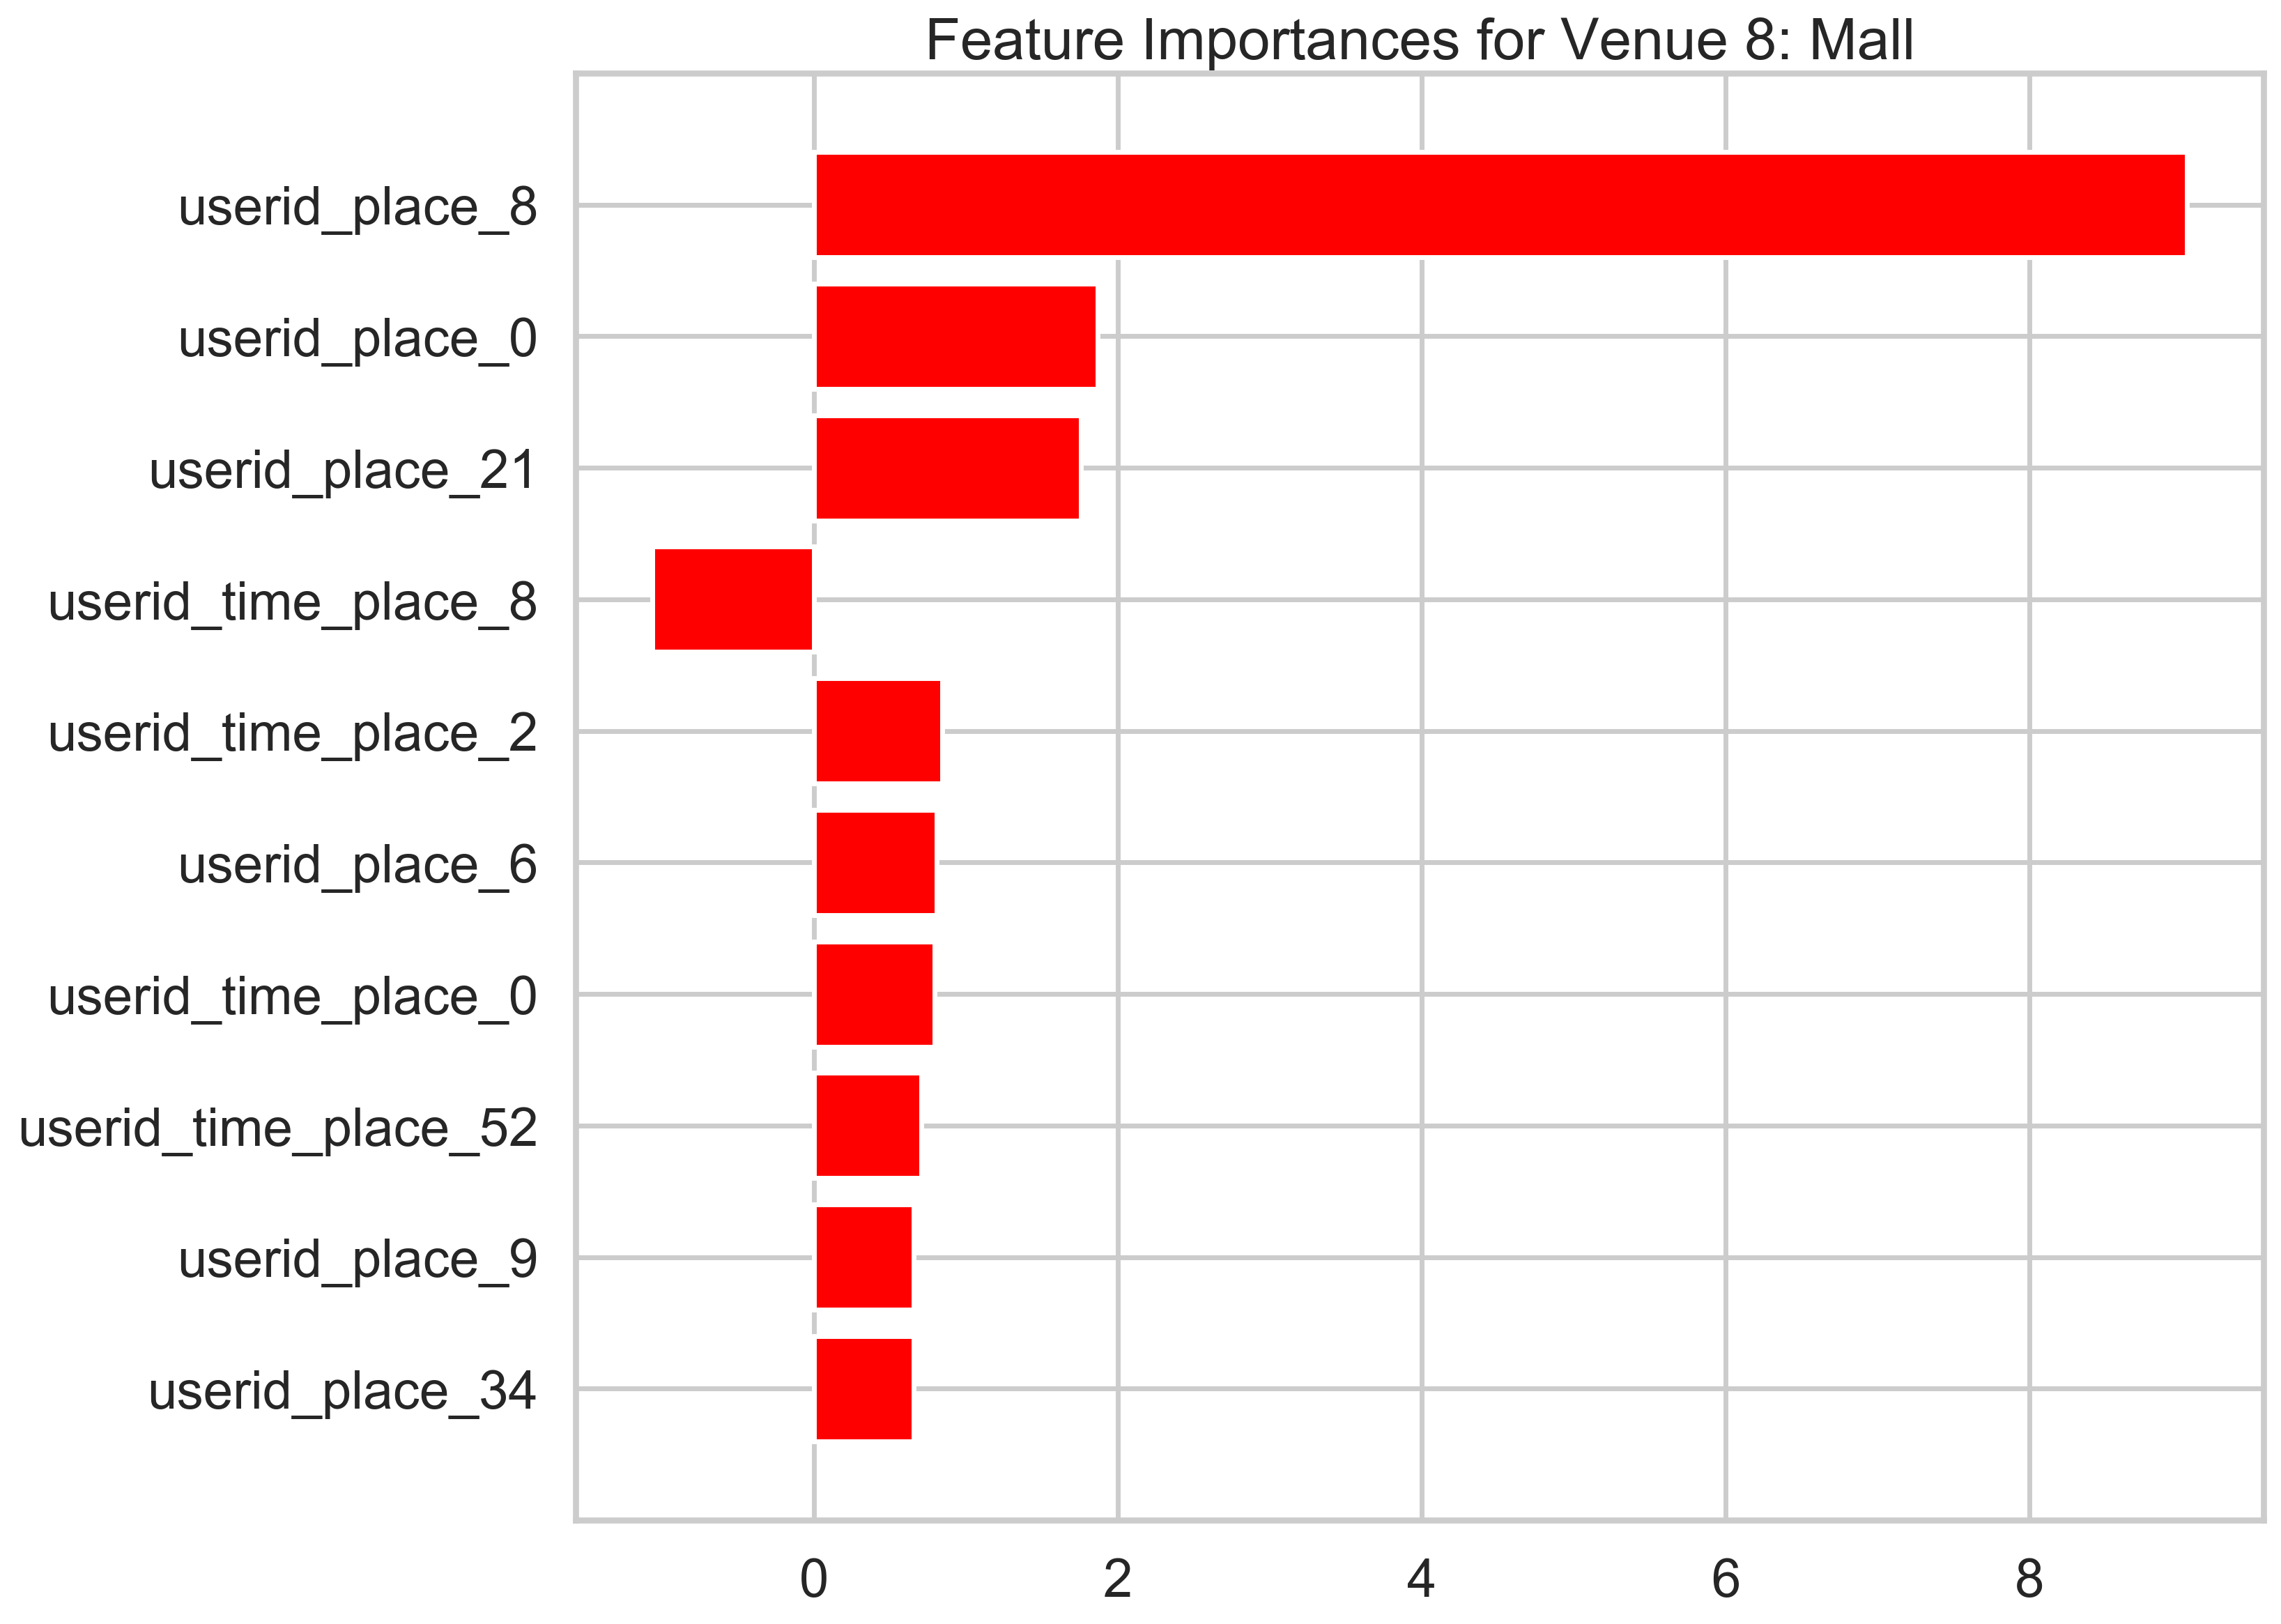

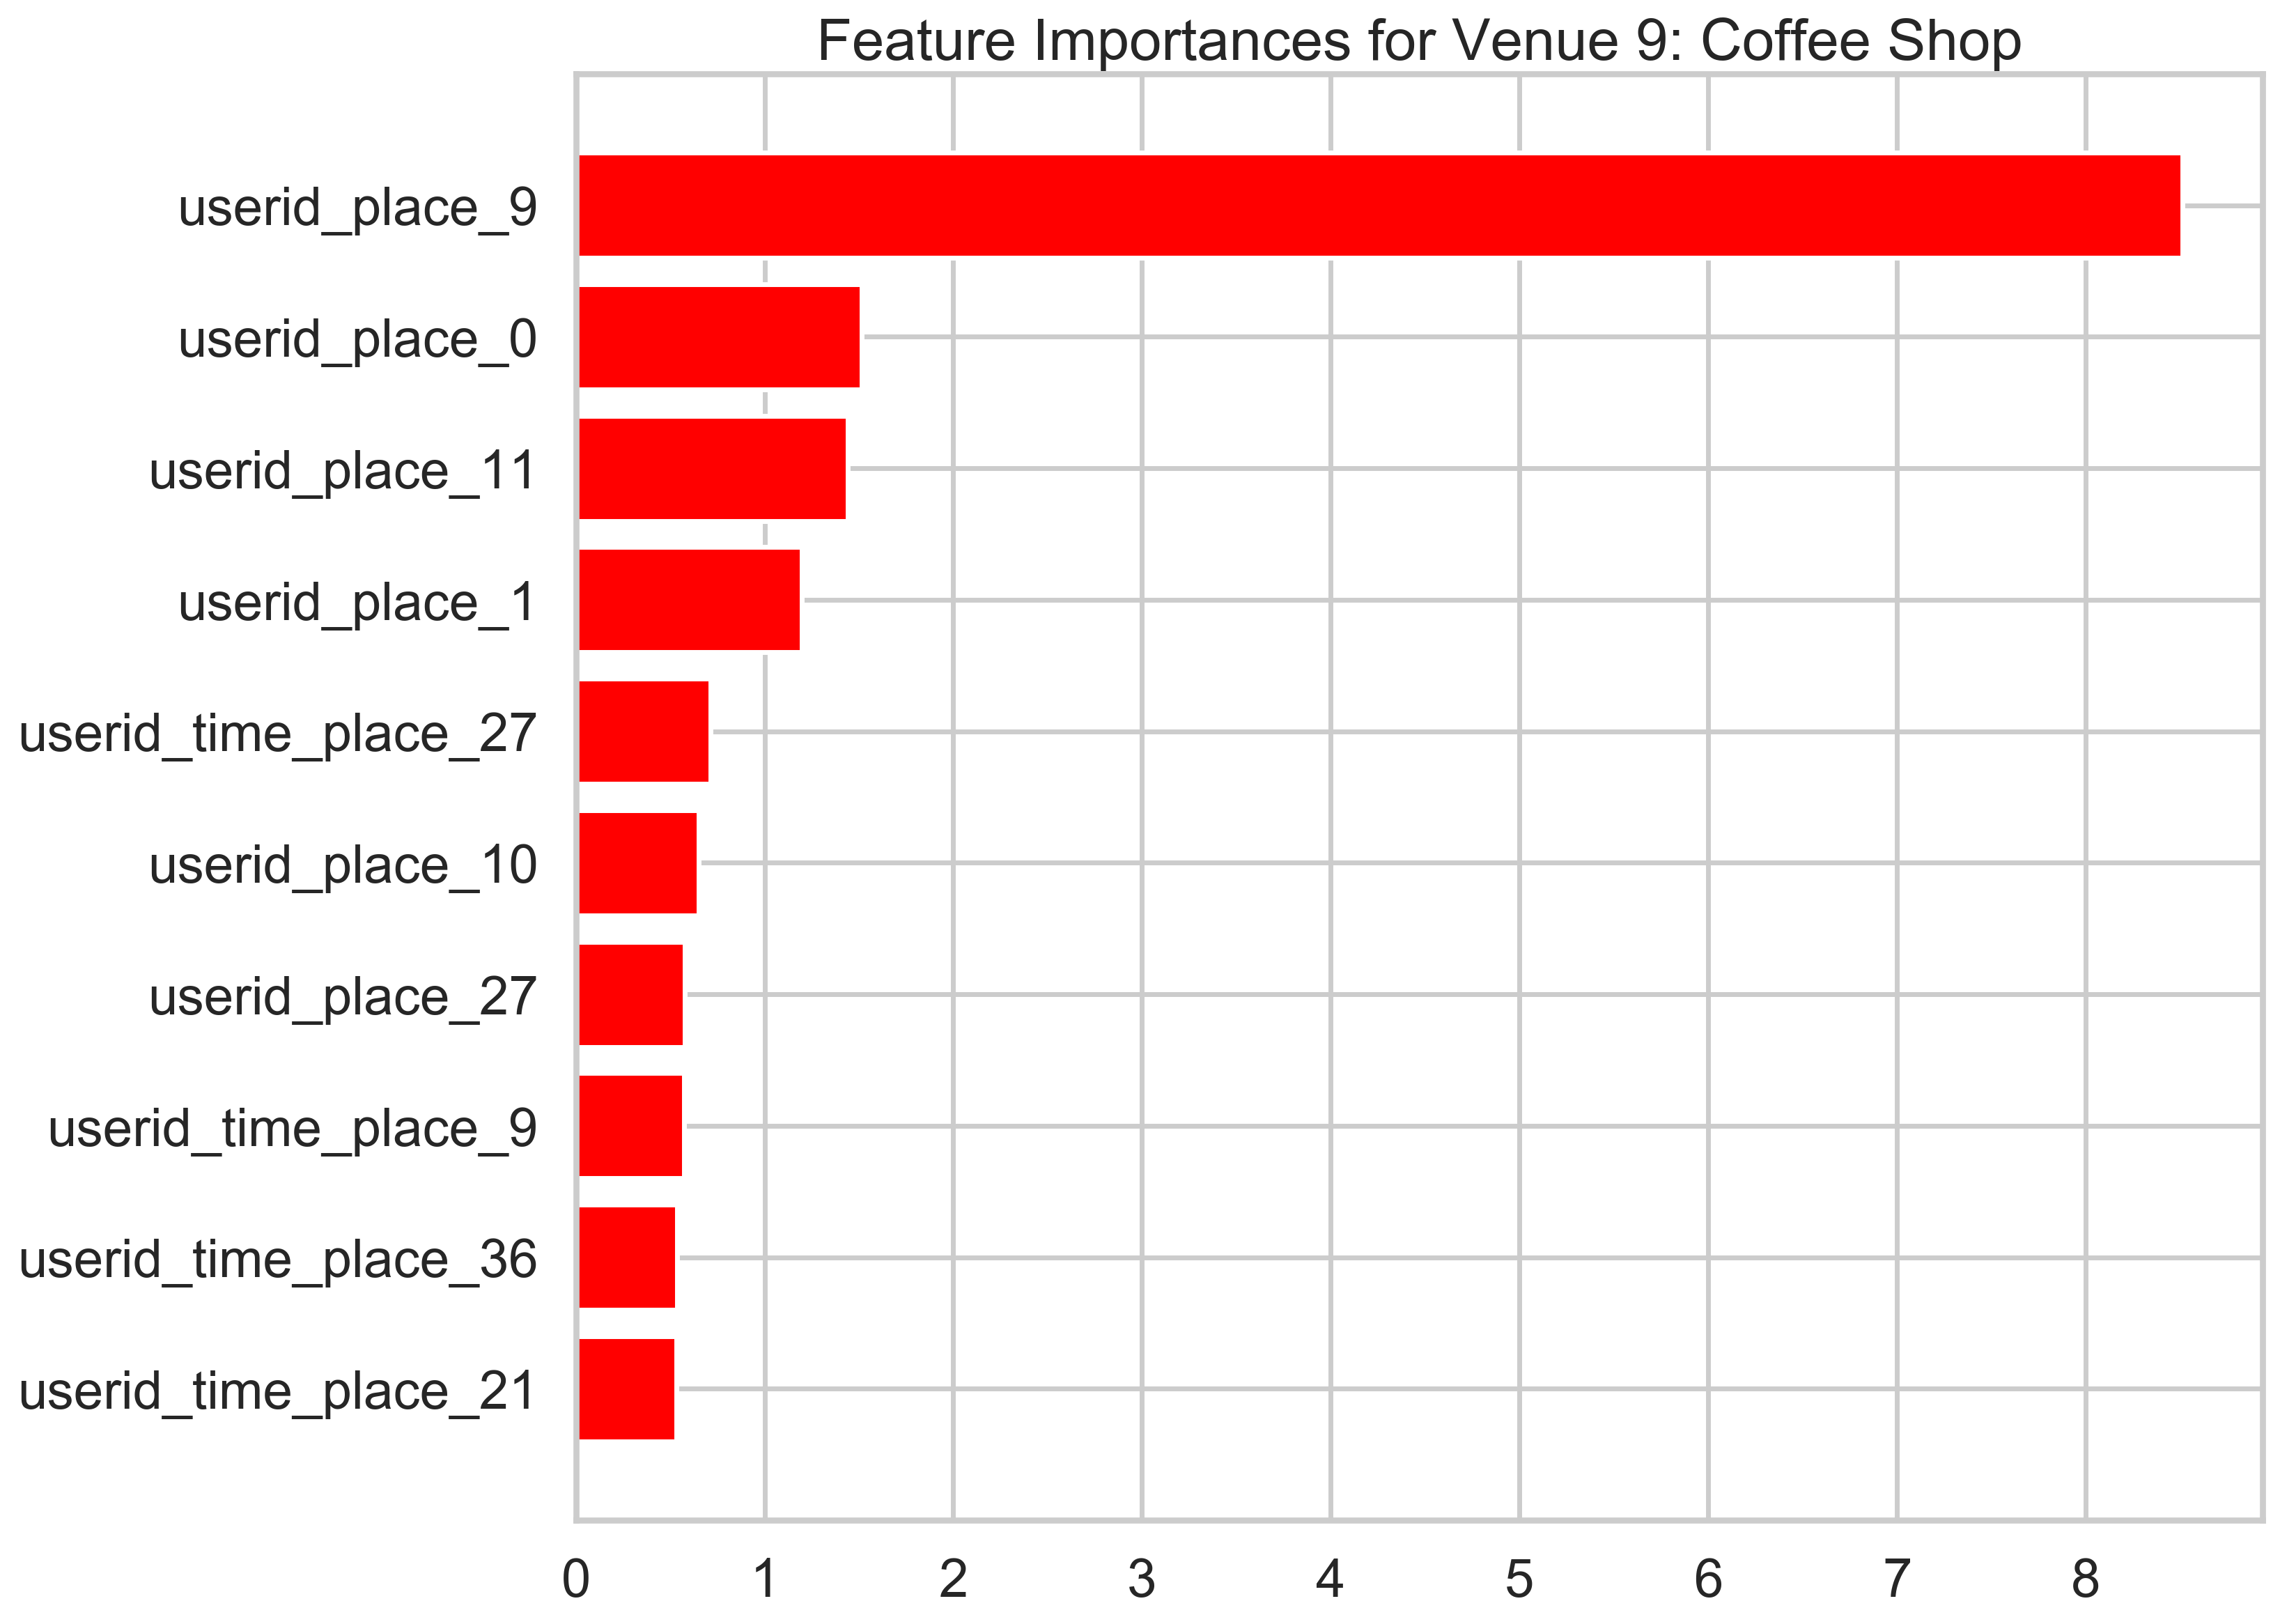

In [16]:
for i in range(10):
    importances = clf.coef_[i]
    indices = np.argsort(abs(importances))
    plt.figure()
    plt.title("Feature Importances for Venue " + top10_venues[i])
    plt.barh(range(10), importances[indices[-10:]], color="r")
    plt.yticks(range(10), df_ML.columns[indices[-10:]])
    plt.ylim([-1, 10])
    plt.show()